In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import matplotlib as mpl

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')

<AsyncResult: finished>

# Import Data

In [10]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [12]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [13]:
tsne_1st = loadData_v1(path_output, exp_id, 'tsne_1st', 'DataFrame')

In [14]:
s_groups_IFE_b = loadData_v1(path_output, exp_id, 's_groups_IFE_b', 'Series')
g_groups_IFE_b = loadData_v1(path_output, exp_id, 'g_groups_IFE_b', 'Series')

In [15]:
s_groups_uHF = loadData_v1(path_output, exp_id, 's_groups_uHF', 'Series')
g_groups_uHF = loadData_v1(path_output, exp_id, 'g_groups_uHF', 'Series')

In [16]:
s_groups_OB = loadData_v1(path_output, exp_id, 's_groups_OB', 'Series')
g_groups_OB = loadData_v1(path_output, exp_id, 'g_groups_OB', 'Series')

In [17]:
s_groups_IB = loadData_v1(path_output, exp_id, 's_groups_IB', 'Series')
g_groups_IB = loadData_v1(path_output, exp_id, 'g_groups_IB', 'Series')

In [18]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [19]:
NBR_2nd_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_traces')
NBR_2nd_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_summary')
NBR_2nd_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_bl')
NBR_2nd_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_bl')
NBR_2nd_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_gr')
NBR_2nd_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_gr')

In [20]:
robustness_IFE_b = loadData_v1(path_output, exp_id, 'robustness_IFE_b', 'DataFrame')
robustness_IFE_b_null = loadData_v1(path_output, exp_id, 'robustness_IFE_b_null', 'DataFrame')

robustness_uHF = loadData_v1(path_output, exp_id, 'robustness_uHF', 'DataFrame')
robustness_uHF_null = loadData_v1(path_output, exp_id, 'robustness_uHF_null', 'DataFrame')

robustness_OB = loadData_v1(path_output, exp_id, 'robustness_OB', 'DataFrame')
robustness_OB_null = loadData_v1(path_output, exp_id, 'robustness_OB_null', 'DataFrame')

robustness_IB = loadData_v1(path_output, exp_id, 'robustness_IB', 'DataFrame')
robustness_IB_null = loadData_v1(path_output, exp_id, 'robustness_IB_null', 'DataFrame')

## Colormaps

In [21]:
cmap_1st = {2:'#00CC00',
          1:'#FFE000',
          8:'#FF9900',
          0:'#FF3300',
          10:'#CC0000',
          6:'#cab2d6',
          3:'#A68BC2',
          4:'#65429A',
          5:'#000066',
          7:'#0066FF',
          9:'#33CCCC',
          11:'#FF99CC',
          12:'#660033'}

In [22]:
#Create colormap and colorlist for hair cycle stage data

cmap_hair_cycle = {'mid telogen (Ki67)': '#00CC00', 'late telogen (Ki67)': '#FFCC00'}

In [23]:
#Create colormap and colorlist for Sca1 data

cmap_Sca1 = {'1': '#FF0000', '0': '#0066FF'}

In [24]:
cmap_IFE_b = {2: '#33a02c',
              1: '#b2df8a',
              0: '#00FF00'}

In [25]:
cmap_uHF = {6:'#CC0066',
            2:'#FF99CC',
            3:'#FFCCCC',
            1:'#D2C5E1',
            5:'#A68BC2',
            4:'#6a3d9a',
            0:'#2A183E'}

In [26]:
cmap_OB = {1:'#0000FF',
           0:'#33CCFF',
           4:'#99CCFF',
           3:'#666699',
           2:'#000066'}

In [27]:
cmap_IB = {2:'#33CCCC',
           1:'#00FFFF',
           0:'#006666'}

In [28]:
cmap_2nd = {0: '#33a02c',
            1: '#b2df8a',
            2: '#00FF00',
            3:'#FFE000',
            4:'#FF9900',
            5:'#FF3300',
            6:'#CC0000',
            7:'#CC0066',
            8:'#FF99CC',
            9:'#FFCCCC',
            10:'#D2C5E1',
            11:'#A68BC2',
            12:'#6a3d9a',
            13:'#2A183E',
            14:'#000066',
            15:'#0000FF',
            16:'#33CCFF',
            17:'#99CCFF',
            18:'#666699',
            19:'#000066',
            20:'#33CCCC',
            21:'#00FFFF',
            22:'#006666',
            23:'#FF99CC',
            24:'#660033'}

In [29]:
markers_2nd = {0: 'o',
            1: 'o',
            2: 'o',
            3:'s',
            4:'s',
            5:'s',
            6:'s',
            7:'^',
            8:'^',
            9:'^',
            10:'^',
            11:'^',
            12:'^',
            13:'^',
            14:'s',
            15:'D',
            16:'D',
            17:'D',
            18:'D',
            19:'D',
            20:'H',
            21:'H',
            22:'H',
            23:'s',
            24:'s'}

In [30]:
markers_2nd_size = {0:750,
            1:750,
            2:750,
            3:750,
            4:750,
            5:750,
            6:750,
            7:750,
            8:750,
            9:750,
            10:750,
            11:750,
            12:750,
            13:750,
            14:750,
            15:500,
            16:500,
            17:500,
            18:500,
            19:500,
            20:750,
            21:750,
            22:750,
            23:750,
            24:750}

## Group identity in subclusterings (s_groups_XY) vs. fused group file (s_groups_2nd)

In [31]:
IFE_b_to_2nd = {2:0,
                1:1,
                0:2}

In [32]:
uHF_to_2nd = {6:7,
              2:8,
              3:9,
              1:10,
              5:11,
              4:12,
              0:13}

In [33]:
OB_to_2nd = {1:15,
             0:16,
             4:17,
             3:18,
             2:19}

In [34]:
IB_to_2nd = {2:20,
             1:21,
             0:22}

## Name maps

In [35]:
nmap_IFE_b = {2:'Interfollicular basal I',
              1:'Interfollicular basal II',
              0:'Infundibular basal'}

In [36]:
gmap_IFE_b = {2:'Krt14(hi), Krt5(hi), Mt2(hi), Fth1(hi),\nThbs1(hi)',
              1:'Krt14(hi), Krt5(hi), Mt2(hi), Fth1(hi),\nThbs1(lo)',
              0:'Krt14(hi), Krt5(hi), Mt2(hi), Fth1(hi),\nSostdc1(hi), Aqp3(hi), Fst(hi), Postn(dim)'}

In [37]:
nmap_uHF = {6:'upper HF I',
            2:'upper HF II',
            3:'upper HF III',
            1:'upper HF IV',
            5:'upper HF V',
            4:'upper HF VI',
            0:'upper HF VII'}

In [38]:
gmap_uHF = {6:'Krt79(hi), Krt17(hi),\nDefb6(hi), Cst6(hi),\nKlk10(hi), Cryab(hi)',
            2:'Krt79(hi), Krt17(hi),\nDefb6(hi), Cst6(dim)\nKrt14(hi), Lrig1(+)\nKrt5(lo), Ptn(lo)',
            3:'Krt79(hi), Krt17(hi),\nDefb6(lo), Cst6(lo),\nKrt14(hi), Lrig1(+)\nKrt5(lo), Ptn(lo)',
            1:'Krt79(lo), Krt17(lo),\nKrt14(hi), Lrig1(+)\nKrt5(hi), Ptn(dim)',
            5:'Krt79(dim), Krt17(dim),\nKrt14(dim), Krt5(dim),\nKrt10(dim), Ptgs1(dim)',
            4:'Krt79(hi), Krt17(hi),\nKrt10(hi), Ptgs1(hi)',
            0:'Krt79(hi), Krt17(hi),\nLor(hi), Flg2(hi)'}

In [39]:
nmap_OB = {1:'Outer bulge I',
           0:'Outer bulge II',
           4:'Outer bulge III',
           3:'Outer bulge IV',
           2:'Outer bulge V'}

In [40]:
gmap_OB = {1:'Postn(hi), Cd34(hi),\nLgr5(hi), Krt24(hi),\nSfrp1(hi)',
           0:'Postn(hi), Cd34(hi),\nLgr5(lo), Krt24(lo),\nSfrp1(lo)',
           4:'Postn(hi), Cd34(hi),\nAspn(hi), Nrep(hi),\nKrt17(hi), Krt15(lo)',
           3:'Postn(hi), Cd34(hi),\nKrt79(hi), Krt17(hi)',
           2:'Postn(hi), Cd34(hi),\nKrt10(hi), Ptgs1(hi)'}

In [41]:
nmap_IB = {2:'Inner bulge I',
           1:'Inner bulge II',
           0:'Inner bulge III'}

In [42]:
gmap_IB = {2:'Krt6a(hi), Krt75(hi)',
           1:'Krt6a(hi), Krt75(hi),\nPostn(hi), Cd34(hi)',
           0:'Krt6a(hi), Krt75(hi),\nKrt10(hi), Ptgs1(hi)'}

In [43]:
nmap_2nd_short = {0:'IFE B I',
                  1:'IFE B II',
                  2:'INFU B',
                  3:'IFE D I',
                  4:'IFE D II',
                  5:'IFE K I',
                  6:'IFE K II',
                  7:'uHF I',
                  8:'uHF II',
                  9:'uHF III',
                  10:'uHF IV',
                  11:'uHF V',
                  12:'uHF VI',
                  13:'uHF VII',
                  14:'SG',
                  15:'OB I',
                  16:'OB II',
                  17:'OB III',
                  18:'OB IV',
                  19:'OB V',
                  20:'IB I',
                  21:'IB II',
                  22:'IB III',
                  23:'TC',
                  24:'LH'}

# IFE basal cells

## t-SNE

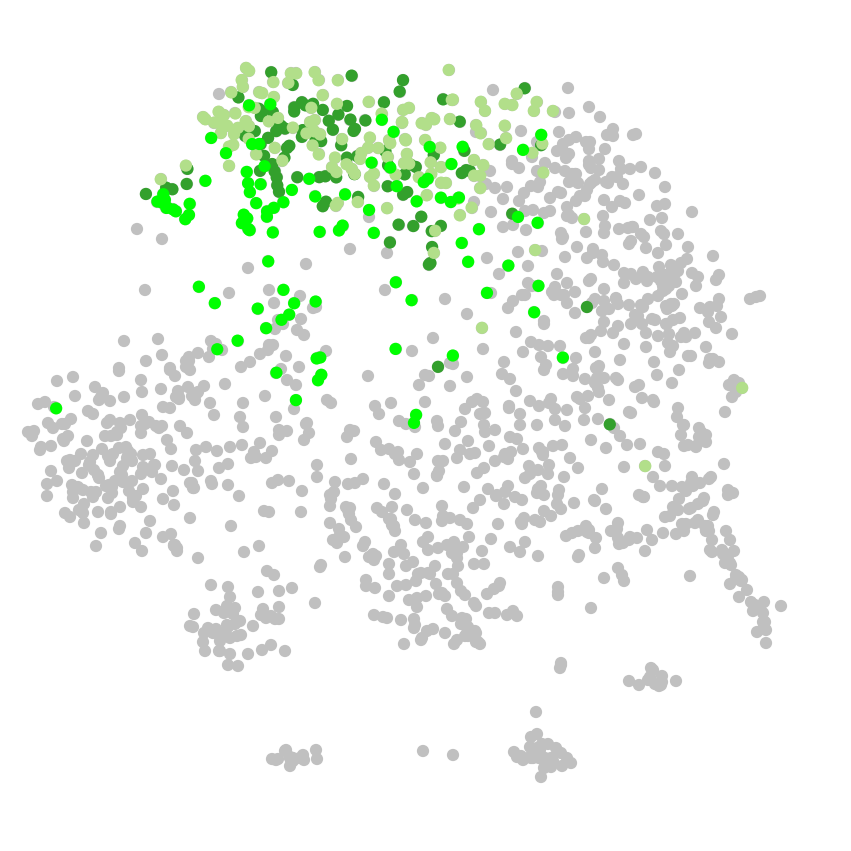

In [305]:
tsne = tsne_1st
cell_groups = s_groups_IFE_b
cmap = cmap_IFE_b

#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - 1, x_max + 3)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - 1, x_max * (y_diff/x_diff) + 3)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

ix_sel = cell_groups.index

#draw groups in background

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

ax1.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

clist_tsne = [cmap[cell_groups[ix]] for ix in ix_sel]

ax1.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 150,
            linewidth = 0.0,
            c = clist_tsne,
            edgecolors = clist_tsne)

clean_axis(ax1)

figname = 'v1.8_2_A_t-SNE_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

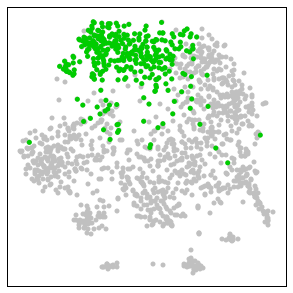

In [306]:
#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

clist_tsne_inset = [cmap_1st[s_groups_1st[ix]] for ix in ix_sel]

ax_inset.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)


ax_inset.scatter(tsne.ix[ix_sel, 'x'],
                tsne.ix[ix_sel, 'y'], 
                s = 25,
                linewidth = 0.0,
                c = clist_tsne_inset,
                edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(1)
    
figname = 'v1.8_S3_A_t-SNE_IFE_b_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Heatmap

In [45]:
#Transfer the expression data to relative values (0 [min] - 1 [max])

seq_sel_IFE_b = log2Transform(seq).ix[g_groups_IFE_b.index, s_groups_IFE_b.index]
seq_sel_IFE_b = seq_sel_IFE_b.apply(lambda x: x / max(x), axis = 1)


Calculating binary logarithm of x + 1


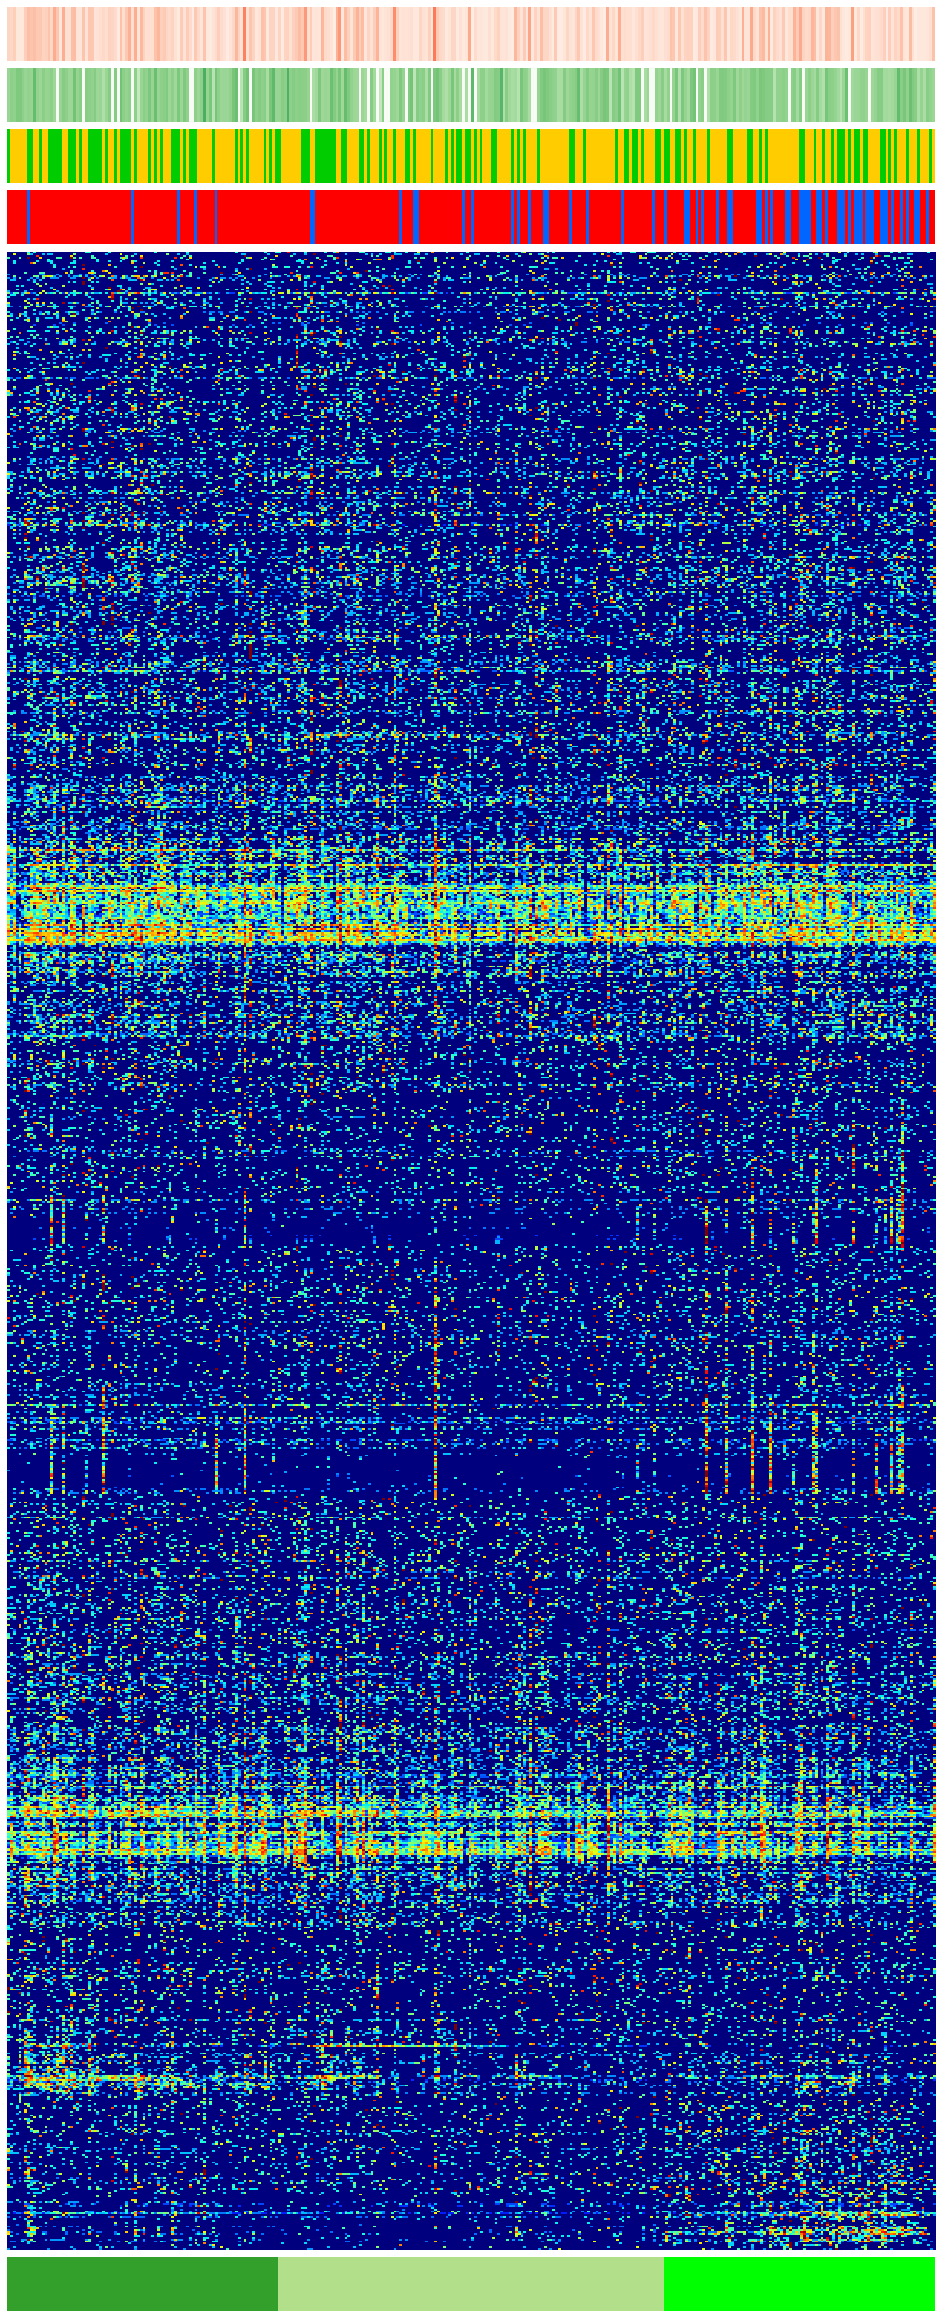

In [262]:
dataset = seq_sel_IFE_b
cell_groups = s_groups_IFE_b
gene_groups = g_groups_IFE_b
cmap = cmap_IFE_b

#create figure

bar_size = 0.75 #size of group and metadata bars
bar_pad = 0.1 #pad size of group and metadata bars
width = 0.04 * len(dataset.columns)
height = 32.0
#height = ((width - bar_size) / len(s_groups)) * len(g_groups) + 5 * bar_size

plt.figure(figsize=(width, height), facecolor = 'w')

#generate main axes

axHM = plt.axes()
axHM.set_position([0.00, 0.00, 1.0, 1.0])


#plot heatmap

axHM.matshow(dataset,
             cmap = plt.cm.jet,
             aspect = 'auto',
             interpolation = 'nearest',
             vmin = 0,
             vmax = 1)

remove_ticks(axHM, linewidth = 1)
clean_axis(axHM)

#create axes divider

divider = make_axes_locatable(axHM)

#draw cell/sample groups

axSG = divider.append_axes("bottom", size= bar_size, pad=bar_pad)

axSG.set_xlim(0, len(cell_groups))

for pos, gr in enumerate(cell_groups):
    axSG.axvspan(pos, pos+1, color=cmap[gr])

remove_ticks(axSG, linewidth = 1)
clean_axis(axSG)

#draw Sca1 metadata

axSCA = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSCA.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axSCA.axvspan(pos, pos+1, color=cmap_Sca1[meta.ix['green_flag', ix]])

remove_ticks(axSCA, linewidth = 1)
clean_axis(axSCA)

#draw hair cycle metadata

axHC = divider.append_axes("top", size= bar_size, pad=bar_pad)

axHC.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axHC.axvspan(pos, pos+1, color=cmap_hair_cycle[meta.ix['hair_cycle_stage', ix]])

remove_ticks(axHC, linewidth = 1)
clean_axis(axHC)

#draw cell size metadata

axSIZE = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSIZE.set_xlim(0, len(cell_groups))

cmapSIZE = plt.cm.Greens
SIZE_max = meta.ix['diameter(um)', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['diameter(um)', ix])
    axSIZE.axvspan(pos, pos+1, color=cmapSIZE(val/SIZE_max))


remove_ticks(axSIZE, linewidth = 1)
clean_axis(axSIZE)

#draw transcript metadata

axTRANS = divider.append_axes("top", size= bar_size, pad=bar_pad)

axTRANS.set_xlim(0, len(cell_groups))

cmapTRANS = plt.cm.Reds
TRANS_max = meta.ix['sum_transcripts', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['sum_transcripts', ix])
    axTRANS.axvspan(pos, pos + 1, color = cmapTRANS(val / TRANS_max))

remove_ticks(axTRANS, linewidth = 1)
clean_axis(axTRANS)


figname = 'v1.8_S3_B_Heatmap_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Barplots

In [206]:
genes_IFE_b = ['Krt14','Krt5','Mt2','Fth1','Thbs1','Avpi1','Krt16','Bhlhe40','Sostdc1', 'Aqp3','Postn','Krt79']

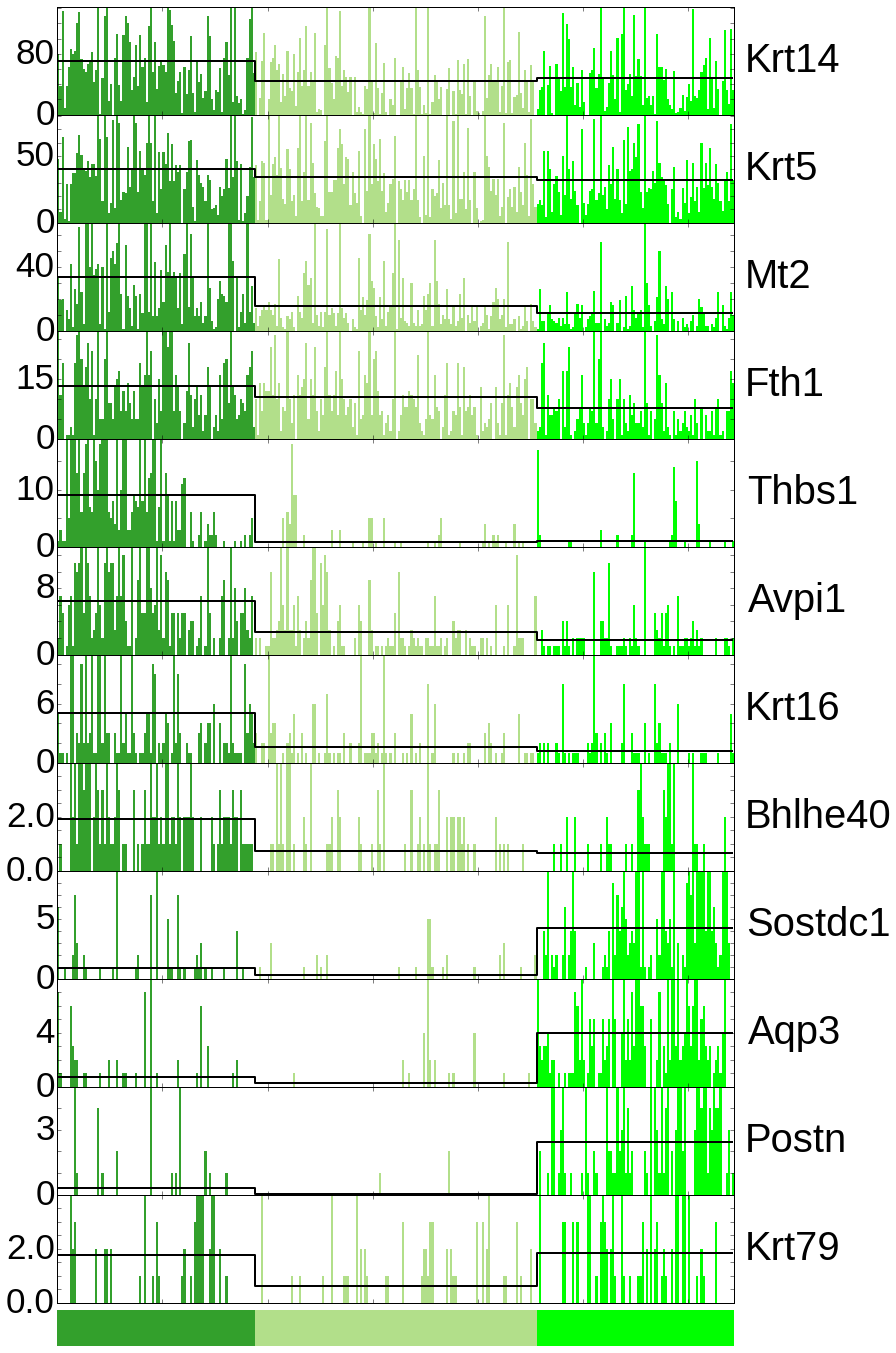

In [208]:
genes = genes_IFE_b
cell_groups = s_groups_IFE_b
dataset = seq[s_groups_IFE_b.index]
cmap = cmap_IFE_b

#create figure

bar_size = 0.5
bar_pad = 0.1
width = 10.0
height = len(genes) * 1.5 + (bar_size + bar_pad)

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 1, hspace = 0.00, wspace = 0.0, top = 1, right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = (bar_pad + bar_size) / height)

#create GS for sample group bar

gs0 = plt.GridSpec(1,1, left = (bar_pad + bar_size) / width, right = 1, top = bar_size / height,
                       bottom = 0, hspace = 0.0, wspace = 0.0)

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for g in genes:
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create axis
            
        ax0 = plt.subplot(gs1[genes.index(g)])
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticklabels([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = np.ceil(np.max(mean_tmp) * 2))
        ax0.set_ylabel(g, family = 'Liberation Sans', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Liberation Sans')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(35)
            else:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups)), [mean_tmp[val] for val in cell_groups], where = 'post', color = 'black', linewidth = 2)

ax1 = plt.subplot(gs0[0])

ax1.set_xlim(0, len(cell_groups))

for s_gr in enumerate(cell_groups):
    
    ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

remove_ticks(ax1, linewidth = 1)
clean_axis(ax1)

figname = 'v1.8_2_A_Markers_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Marker vs baseline

In [57]:
genes_baseline_IFE_b = neg_binom_extract_genes(NBR_2nd_size_bl[[0,1,2]], score = 'percentile - 25', number = 10)

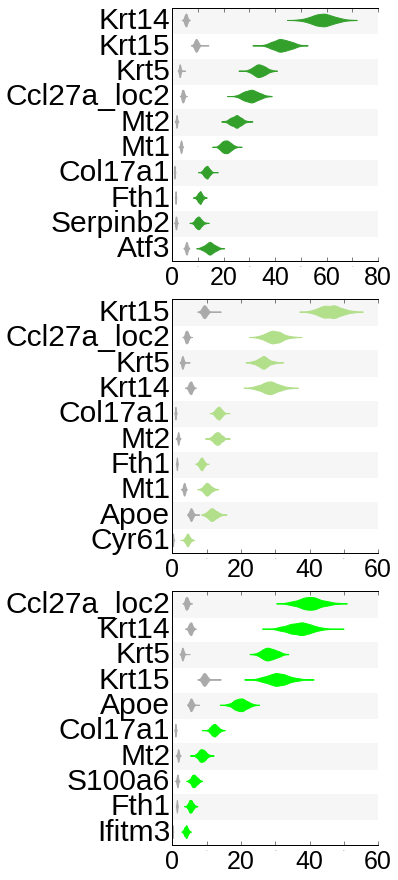

In [268]:
#define input variables

gr_order = return_unique(s_groups_IFE_b)
genes = genes_baseline_IFE_b
L = len(genes.index)
traces = NBR_2nd_traces
cmap = cmap_IFE_b
to_2nd = IFE_b_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)


figname = 'v1.8_S3_C_Markers_vs_Baseline_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Marker vs. other groups

In [65]:
NBR_2nd_bin_gr_IFE_b, NBR_2nd_size_gr_IFE_b = neg_binom_vs_groups_v1P(NBR_2nd_summary[['0','1','2','Baseline']], dview, PP='95')

In [60]:
genes_groups_IFE_b = neg_binom_extract_genes(NBR_2nd_size_gr_IFE_b, score = 'percentile - 25', number = 10)

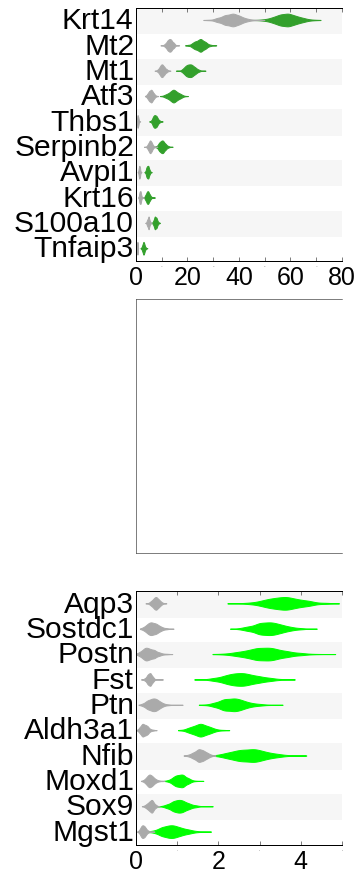

In [267]:
#define input variables

gr_order = return_unique(s_groups_IFE_b)
genes = genes_groups_IFE_b
L = len(genes.index)
traces = NBR_2nd_traces
summary = NBR_2nd_summary[['0','1','2','Baseline']]
cmap = cmap_IFE_b
to_2nd = IFE_b_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_sec = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_sec]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_C_Markers_vs_Groups_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Robustness

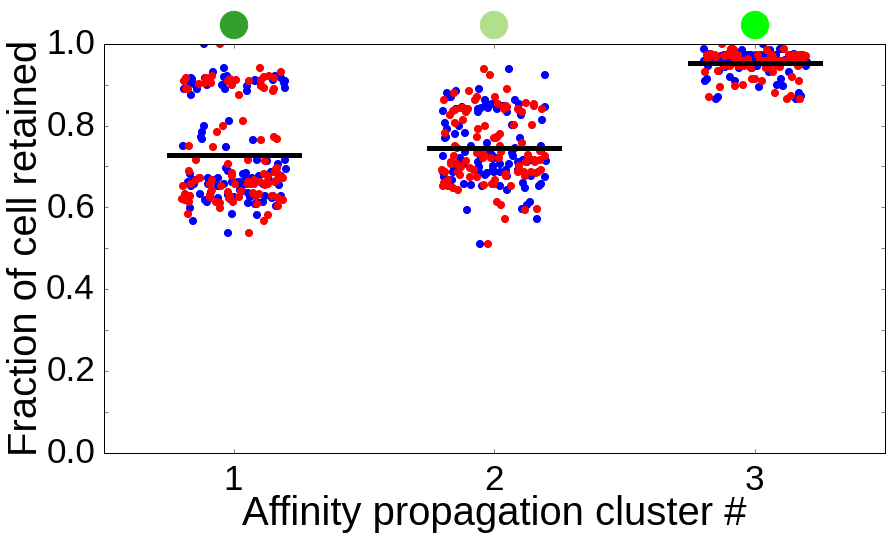

In [290]:
robustness = robustness_IFE_b
robustness_null = robustness_IFE_b
cell_groups = s_groups_IFE_b
cmap = cmap_IFE_b

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14, 8))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax.set_xticks(range(len(set(cell_groups))))
ax.set_xticklabels(np.arange(0, len(set(cell_groups))) + 1, family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Affinity propagation cluster #', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Fraction of cell retained', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.075, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness[str(gr)],
               s = 50, 
               color = 'blue')
    
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
       
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness_null[str(gr)],
               s = 50, 
               color = 'red')
        
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness_null[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
    
#plot color symbols

ax_Sym = plt.subplot(gs[0])

ax_Sym.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax_Sym.set_ylim(-0.5, 0.5)

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax_Sym.scatter(ix,
               0.0,
               marker = 'o',
               s = 750,
               color = cmap[gr])
    
clean_axis(ax_Sym)

figname = 'v1.8_S3_g_Robustness_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

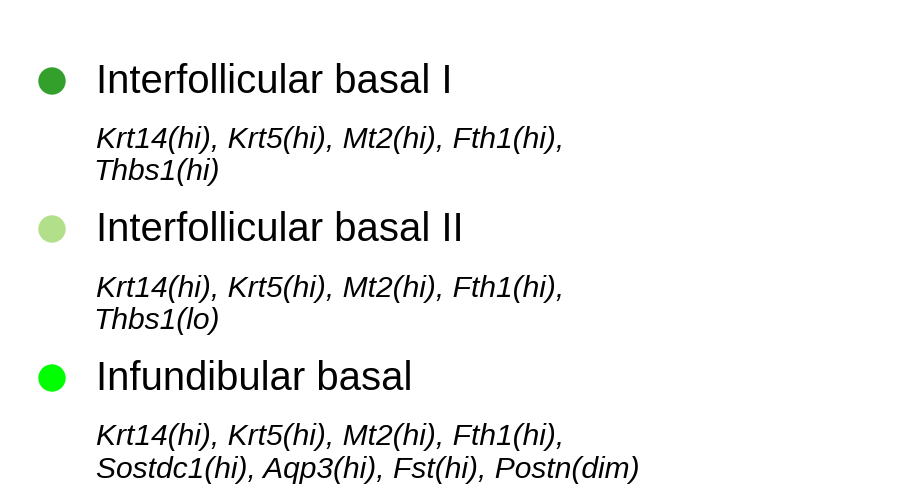

In [200]:
cell_groups = s_groups_IFE_b
group_pos = [(0.5,0),(0.5,1), (0.5,2)]
cmap = cmap_IFE_b
nmap = nmap_IFE_b
nmap_genes = gmap_IFE_b

#initialize figure

width = 16
height = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax0 = plt.subplot()
ax0.set_ylim(2.5, -0.5)
ax0.set_xlim(0, 10)

group_list = return_unique(cell_groups)



for pos, gr in enumerate(group_list):
    
    pos_tmp = group_pos[pos]
    
    ax0.scatter(pos_tmp[0], pos_tmp[1], c = cmap[gr], marker = 'o', vmin = 0, vmax = 1.0, s = 750, 
                linewidth = 0.0, edgecolor = cmap[gr])
        
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1], nmap[gr], family = 'Liberation Sans', 
             fontsize = 40, va = 'center', ha = 'left')
    
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1] + 0.5, nmap_genes[group_list[pos]], 
             fontsize = 30, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')

clean_axis(ax0)

figname = 'v1.8_2_A_Legend_IFE_b.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Upper HF cells

## t-SNE

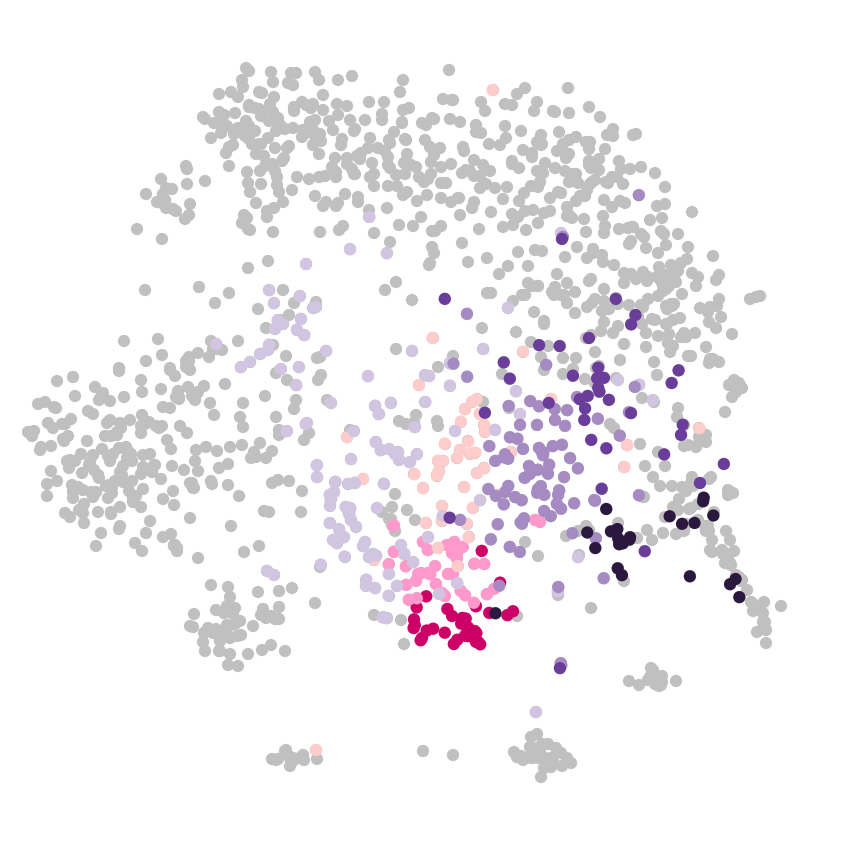

In [307]:
tsne = tsne_1st
cell_groups = s_groups_uHF
cmap = cmap_uHF

#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - 1, x_max + 3)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - 1, x_max * (y_diff/x_diff) + 3)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

ix_sel = cell_groups.index

#draw groups in background

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

ax1.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

clist_tsne = [cmap[cell_groups[ix]] for ix in ix_sel]

ax1.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 150,
            linewidth = 0.0,
            c = clist_tsne,
            edgecolors = clist_tsne)

clean_axis(ax1)

figname = 'v1.8_2_B_t-SNE_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

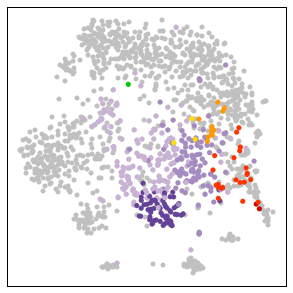

In [308]:
#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

clist_tsne_inset = [cmap_1st[s_groups_1st[ix]] for ix in ix_sel]

ax_inset.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)


ax_inset.scatter(tsne.ix[ix_sel, 'x'],
                tsne.ix[ix_sel, 'y'], 
                s = 25,
                linewidth = 0.0,
                c = clist_tsne_inset,
                edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(1)
    
figname = 'v1.8_S3_A_t-SNE_uHF_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Heatmap

In [111]:
#Transfer the expression data to relative values (0 [min] - 1 [max])

seq_sel_uHF = log2Transform(seq).ix[g_groups_uHF.index, s_groups_uHF.index]
seq_sel_uHF = seq_sel_uHF.apply(lambda x: x / max(x), axis = 1)


Calculating binary logarithm of x + 1


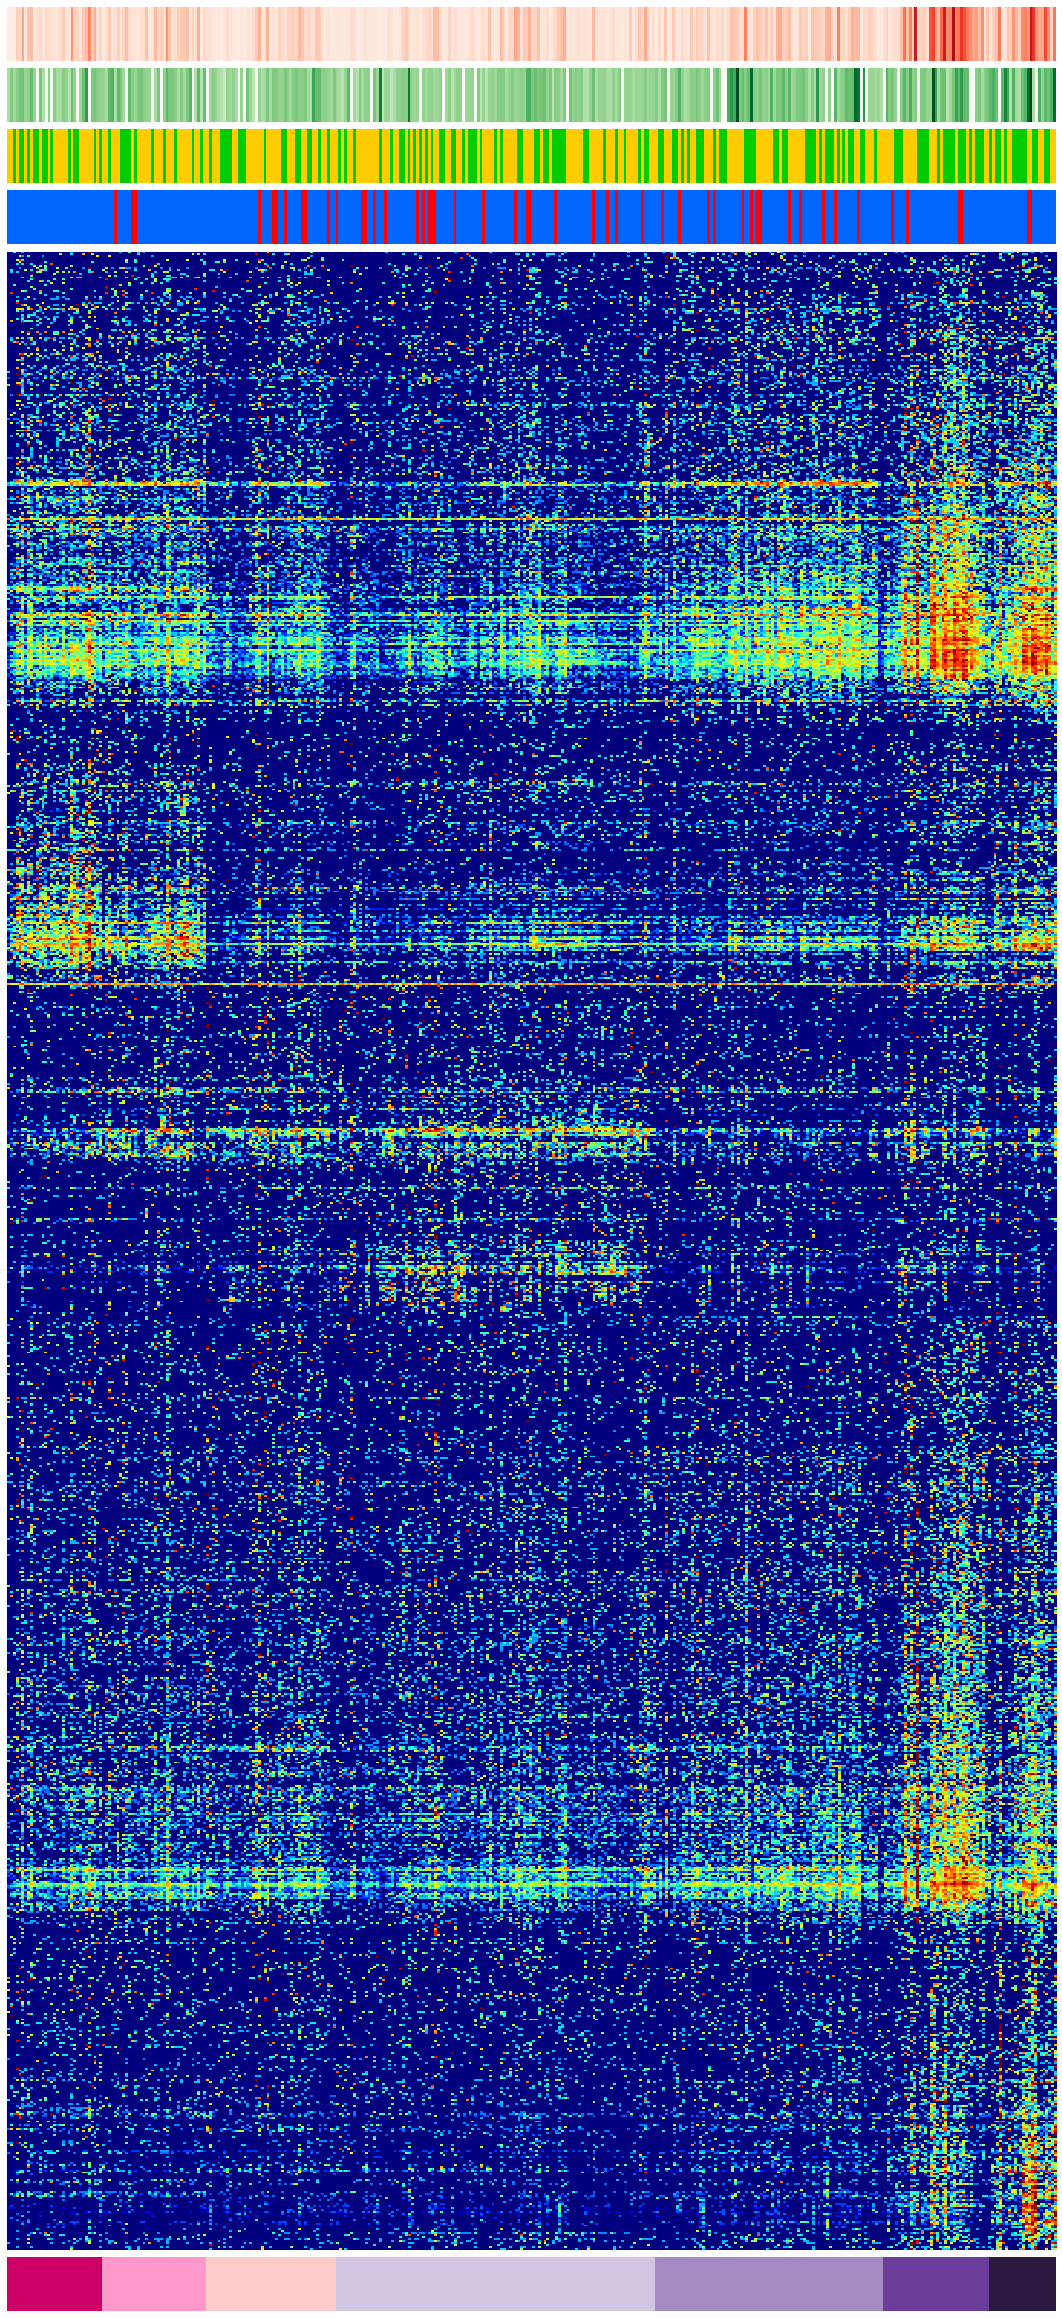

In [263]:
dataset = seq_sel_uHF
cell_groups = s_groups_uHF
gene_groups = g_groups_uHF
cmap = cmap_uHF

#create figure

bar_size = 0.75 #size of group and metadata bars
bar_pad = 0.1 #pad size of group and metadata bars
width = 0.04 * len(dataset.columns)
height = 32.0
#height = ((width - bar_size) / len(s_groups)) * len(g_groups) + 5 * bar_size

plt.figure(figsize=(width, height), facecolor = 'w')

#generate main axes

axHM = plt.axes()
axHM.set_position([0.00, 0.00, 1.0, 1.0])


#plot heatmap

axHM.matshow(dataset,
             cmap = plt.cm.jet,
             aspect = 'auto',
             interpolation = 'nearest',
             vmin = 0,
             vmax = 1)

remove_ticks(axHM, linewidth = 1)
clean_axis(axHM)

#create axes divider

divider = make_axes_locatable(axHM)

#draw cell/sample groups

axSG = divider.append_axes("bottom", size= bar_size, pad=bar_pad)

axSG.set_xlim(0, len(cell_groups))

for pos, gr in enumerate(cell_groups):
    axSG.axvspan(pos, pos+1, color=cmap[gr])

remove_ticks(axSG, linewidth = 1)
clean_axis(axSG)

#draw Sca1 metadata

axSCA = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSCA.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axSCA.axvspan(pos, pos+1, color=cmap_Sca1[meta.ix['green_flag', ix]])

remove_ticks(axSCA, linewidth = 1)
clean_axis(axSCA)

#draw hair cycle metadata

axHC = divider.append_axes("top", size= bar_size, pad=bar_pad)

axHC.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axHC.axvspan(pos, pos+1, color=cmap_hair_cycle[meta.ix['hair_cycle_stage', ix]])

remove_ticks(axHC, linewidth = 1)
clean_axis(axHC)

#draw cell size metadata

axSIZE = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSIZE.set_xlim(0, len(cell_groups))

cmapSIZE = plt.cm.Greens
SIZE_max = meta.ix['diameter(um)', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['diameter(um)', ix])
    axSIZE.axvspan(pos, pos+1, color=cmapSIZE(val/SIZE_max))


remove_ticks(axSIZE, linewidth = 1)
clean_axis(axSIZE)

#draw transcript metadata

axTRANS = divider.append_axes("top", size= bar_size, pad=bar_pad)

axTRANS.set_xlim(0, len(cell_groups))

cmapTRANS = plt.cm.Reds
TRANS_max = meta.ix['sum_transcripts', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['sum_transcripts', ix])
    axTRANS.axvspan(pos, pos + 1, color = cmapTRANS(val / TRANS_max))

remove_ticks(axTRANS, linewidth = 1)
clean_axis(axTRANS)


figname = 'v1.8_S3_B_Heatmap_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Barplots

In [96]:
genes_uHF = ['Krt79','Krt17','Klk10','Cryab','Rbp1','Defb6','Cst6','Krt14','Lrig1','Krt5','Ptn','Krt10','Ptgs1','Lor','Flg2']

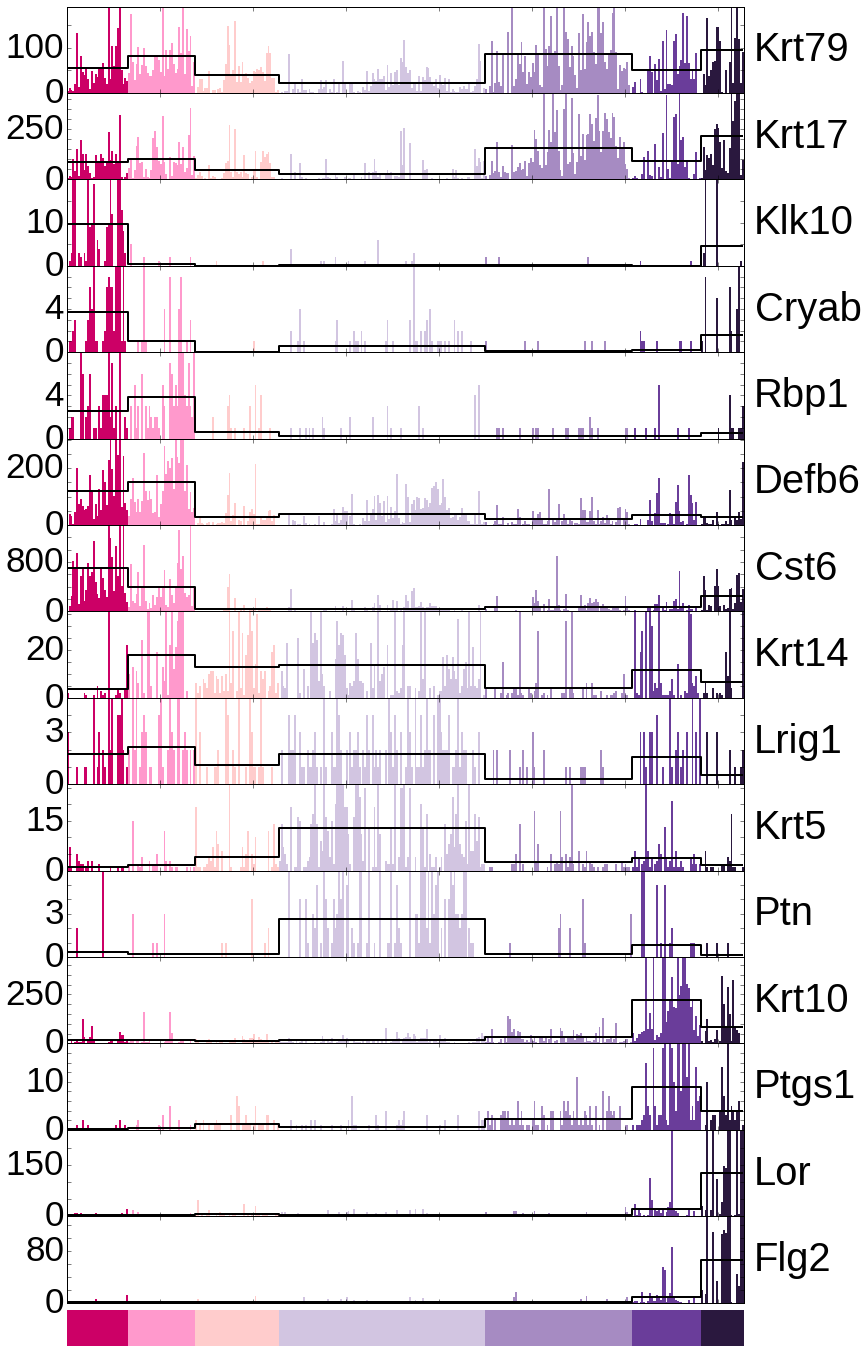

In [99]:
genes = genes_uHF
cell_groups = s_groups_uHF
dataset = seq[s_groups_uHF.index]
cmap = cmap_uHF

#create figure

bar_size = 0.5
bar_pad = 0.1
width = 10.0
height = len(genes) * 1.20 + (bar_size + bar_pad)

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 1, hspace = 0.00, wspace = 0.0, top = 1, right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = (bar_pad + bar_size) / height)

#create GS for sample group bar

gs0 = plt.GridSpec(1,1, left = (bar_pad + bar_size) / width, right = 1, top = bar_size / height,
                       bottom = 0, hspace = 0.0, wspace = 0.0)

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for g in genes:
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create axis
            
        ax0 = plt.subplot(gs1[genes.index(g)])
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticklabels([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = np.ceil(np.max(mean_tmp) * 2))
        ax0.set_ylabel(g, family = 'Liberation Sans', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Liberation Sans')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(35)
            else:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups)), [mean_tmp[val] for val in cell_groups], where = 'post', color = 'black', linewidth = 2)

ax1 = plt.subplot(gs0[0])

ax1.set_xlim(0, len(cell_groups))

for s_gr in enumerate(cell_groups):
    
    ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

remove_ticks(ax1, linewidth = 1)
clean_axis(ax1)

figname = 'v1.8_2_B_Markers_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers against baseline

In [117]:
genes_baseline_uHF = neg_binom_extract_genes(NBR_2nd_size_bl, score = 'percentile - 25', number = 10)

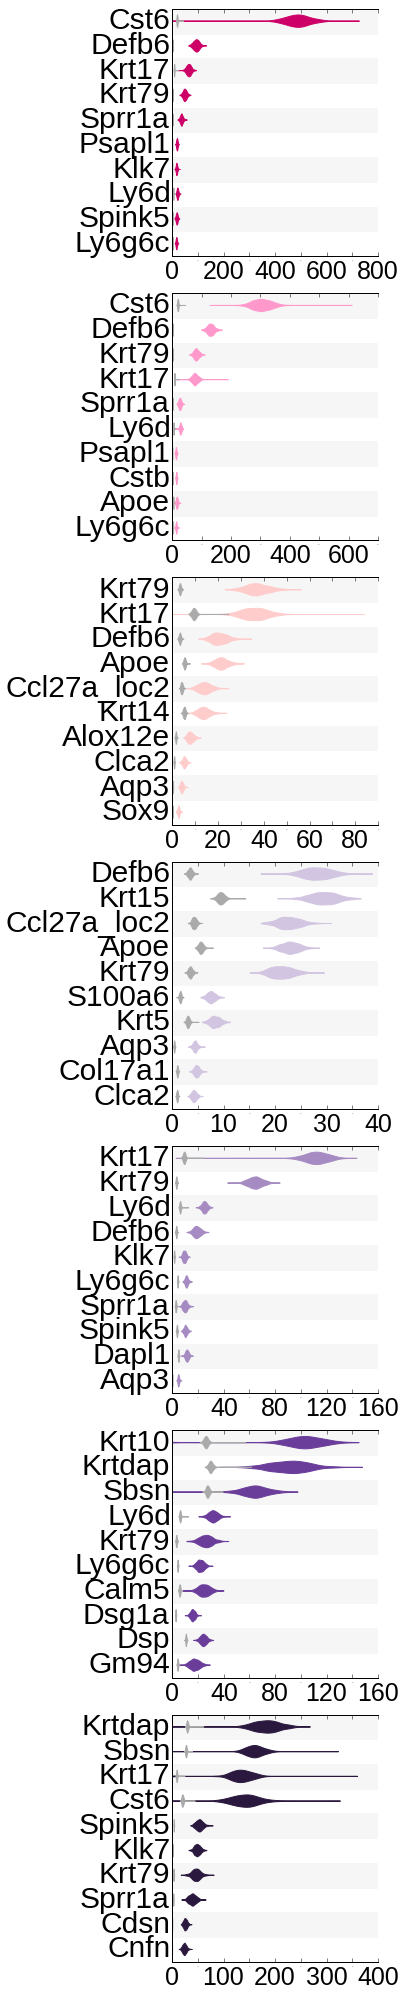

In [269]:
#define input variables

gr_order = return_unique(s_groups_uHF)
genes = genes_baseline_uHF
L = len(genes.index)
traces = NBR_2nd_traces
cmap = cmap_uHF
to_2nd = uHF_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_D_Markers_vs_Baseline_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers vs. other groups

In [66]:
NBR_2nd_bin_gr_uHF, NBR_2nd_size_gr_uHF = neg_binom_vs_groups_v1P(NBR_2nd_summary[['7','8','9','10','11','12','13','Baseline']], dview, PP='95')

In [121]:
genes_groups_uHF = neg_binom_extract_genes(NBR_2nd_size_gr_uHF, score = 'percentile - 25', number = 10)

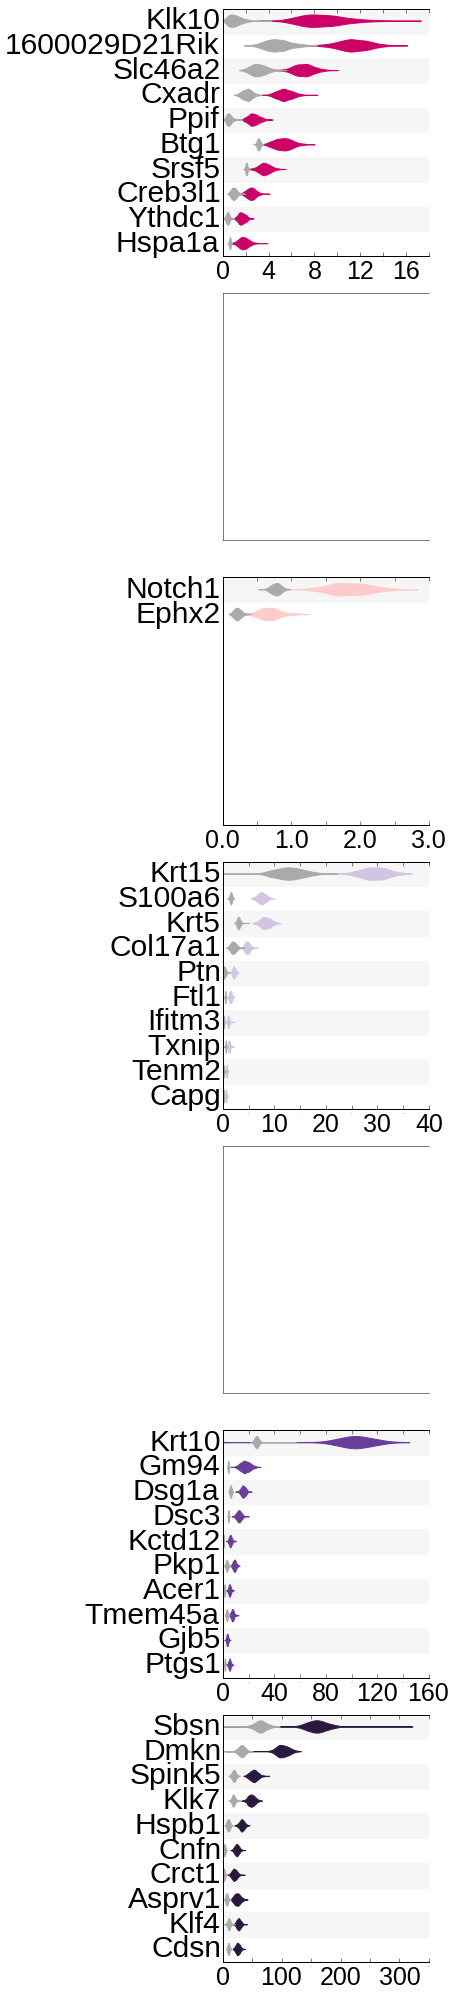

In [270]:
#define input variables

gr_order = return_unique(s_groups_uHF)
genes = genes_groups_uHF
L = len(genes.index)
traces = NBR_2nd_traces
summary = NBR_2nd_summary[['7','8','9','10','11','12','13','Baseline']]
cmap = cmap_uHF
to_2nd = uHF_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_sec = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_sec]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_D_Markers_vs_Groups_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Robustness

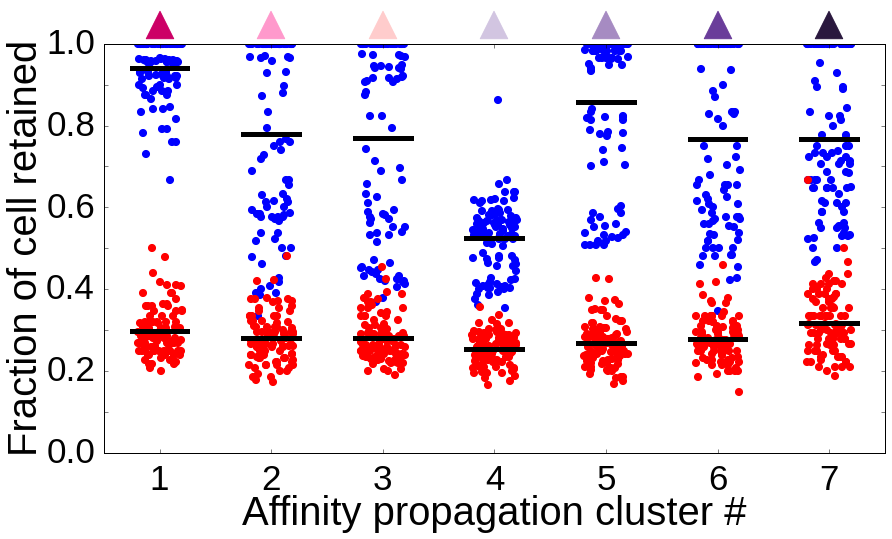

In [289]:
robustness = robustness_uHF
robustness_null = robustness_uHF_null
cell_groups = s_groups_uHF
cmap = cmap_uHF

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14, 8))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax.set_xticks(range(len(set(cell_groups))))
ax.set_xticklabels(np.arange(0, len(set(cell_groups))) + 1, family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Affinity propagation cluster #', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Fraction of cell retained', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.075, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness[str(gr)],
               s = 50, 
               color = 'blue')
    
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
       
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness_null[str(gr)],
               s = 50, 
               color = 'red')
        
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness_null[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
    
#plot color symbols

ax_Sym = plt.subplot(gs[0])

ax_Sym.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax_Sym.set_ylim(-0.5, 0.5)

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax_Sym.scatter(ix,
               0.0,
               marker = '^',
               s = 750,
               color = cmap[gr])
    
clean_axis(ax_Sym)

figname = 'v1.8_S3_H_Robustness_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

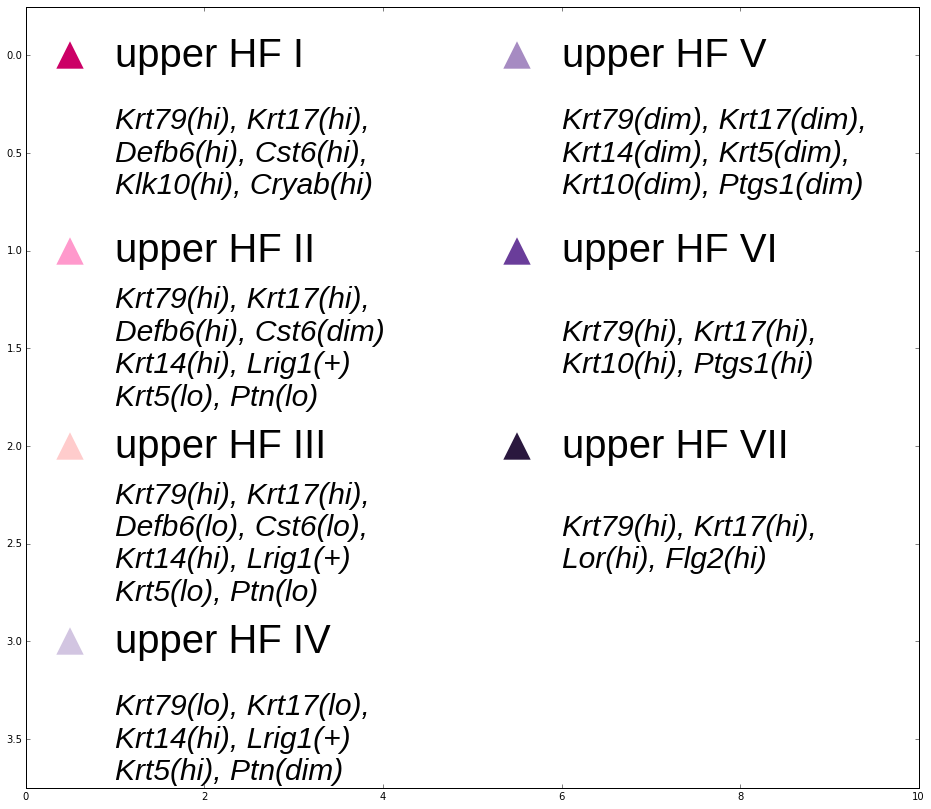

In [233]:
cell_groups = s_groups_uHF
group_pos = [(0.5,0),(0.5,1),(0.5,2),(0.5,3),(5.5,0),(5.5,1),(5.5,2)]
cmap = cmap_uHF
nmap = nmap_uHF
nmap_genes = gmap_uHF

#initialize figure

width = 16
height = 14

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax0 = plt.subplot()
ax0.set_ylim(3.75, -0.25)
ax0.set_xlim(0, 10)

group_list = return_unique(cell_groups)

for pos, gr in enumerate(group_list):
    
    pos_tmp = group_pos[pos]
    
    ax0.scatter(pos_tmp[0], pos_tmp[1], c = cmap[gr], marker = '^', vmin = 0, vmax = 1.0, s = 750, 
                linewidth = 0.0, edgecolor = cmap[gr])
        
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1], nmap[gr], family = 'Liberation Sans', 
             fontsize = 40, va = 'center', ha = 'left')
    
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1] + 0.5, nmap_genes[group_list[pos]], 
             fontsize = 30, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')

#clean_axis(ax0)

figname = 'v1.8_2_B_Legend_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Outer bulge cells

## t-SNE

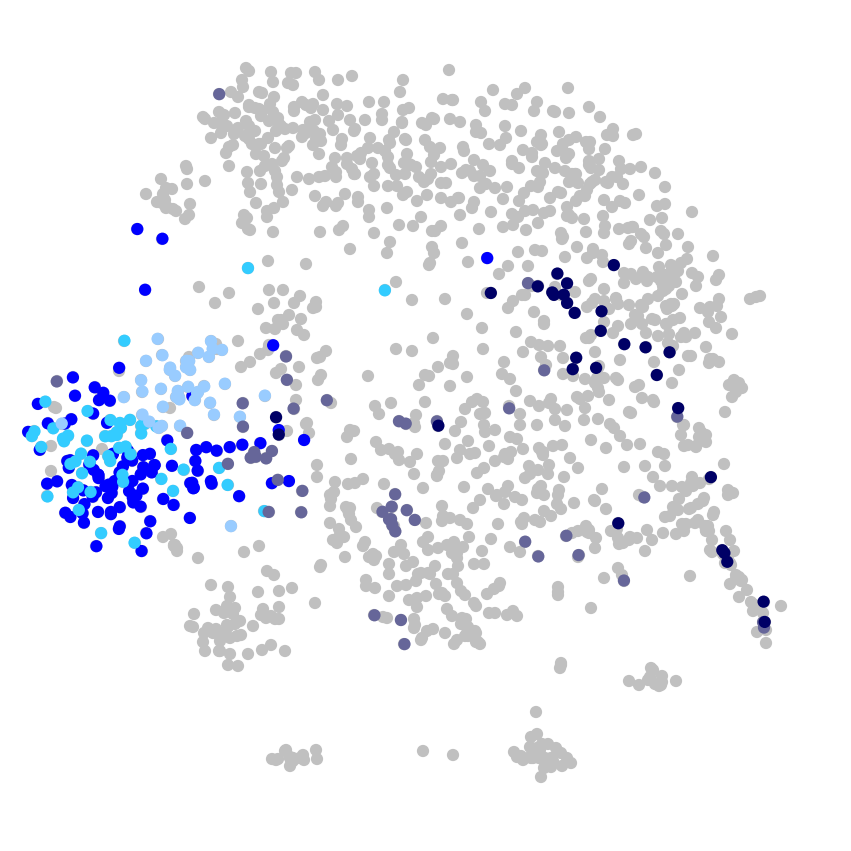

In [309]:
tsne = tsne_1st
cell_groups = s_groups_OB
cmap = cmap_OB

#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - 1, x_max + 3)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - 1, x_max * (y_diff/x_diff) + 3)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

ix_sel = cell_groups.index

#draw groups in background

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

ax1.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

clist_tsne = [cmap[cell_groups[ix]] for ix in ix_sel]

ax1.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 150,
            linewidth = 0.0,
            c = clist_tsne,
            edgecolors = clist_tsne)

clean_axis(ax1)

figname = 'v1.8_2_C_t-SNE_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

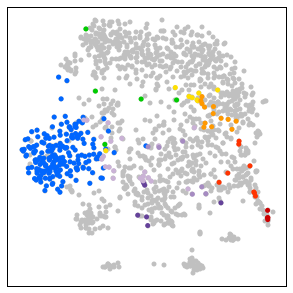

In [310]:
#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

clist_tsne_inset = [cmap_1st[s_groups_1st[ix]] for ix in ix_sel]

ax_inset.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)


ax_inset.scatter(tsne.ix[ix_sel, 'x'],
                tsne.ix[ix_sel, 'y'], 
                s = 25,
                linewidth = 0.0,
                c = clist_tsne_inset,
                edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(1)
    
figname = 'v1.8_S3_A_t-SNE_OB_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Heatmap

In [135]:
#Transfer the expression data to relative values (0 [min] - 1 [max])

seq_sel_OB = log2Transform(seq).ix[g_groups_OB.index, s_groups_OB.index]
seq_sel_OB = seq_sel_OB.apply(lambda x: x / max(x), axis = 1)


Calculating binary logarithm of x + 1


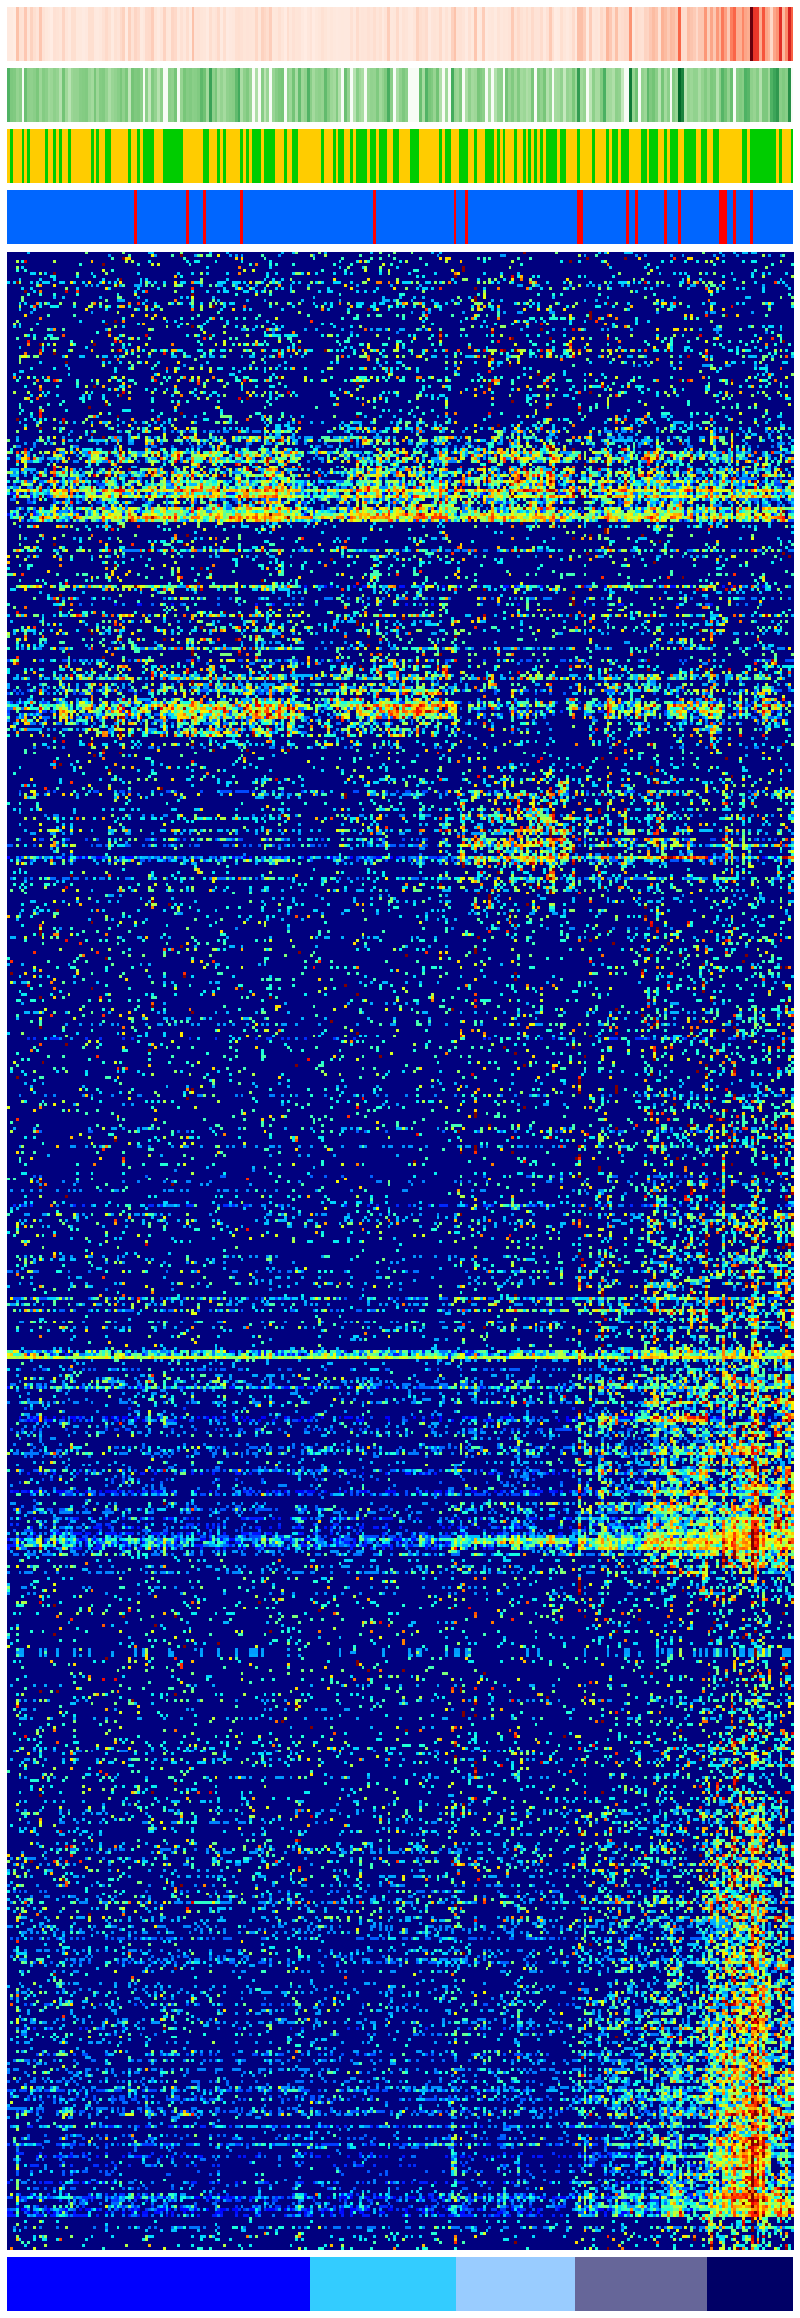

In [265]:
dataset = seq_sel_OB
cell_groups = s_groups_OB
gene_groups = g_groups_OB
cmap = cmap_OB

#create figure

bar_size = 0.75 #size of group and metadata bars
bar_pad = 0.1 #pad size of group and metadata bars
width = 0.04 * len(dataset.columns)
height = 32.0
#height = ((width - bar_size) / len(s_groups)) * len(g_groups) + 5 * bar_size

plt.figure(figsize=(width, height), facecolor = 'w')

#generate main axes

axHM = plt.axes()
axHM.set_position([0.00, 0.00, 1.0, 1.0])


#plot heatmap

axHM.matshow(dataset,
             cmap = plt.cm.jet,
             aspect = 'auto',
             interpolation = 'nearest',
             vmin = 0,
             vmax = 1)

remove_ticks(axHM, linewidth = 1)
clean_axis(axHM)

#create axes divider

divider = make_axes_locatable(axHM)

#draw cell/sample groups

axSG = divider.append_axes("bottom", size= bar_size, pad=bar_pad)

axSG.set_xlim(0, len(cell_groups))

for pos, gr in enumerate(cell_groups):
    axSG.axvspan(pos, pos+1, color=cmap[gr])

remove_ticks(axSG, linewidth = 1)
clean_axis(axSG)

#draw Sca1 metadata

axSCA = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSCA.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axSCA.axvspan(pos, pos+1, color=cmap_Sca1[meta.ix['green_flag', ix]])

remove_ticks(axSCA, linewidth = 1)
clean_axis(axSCA)

#draw hair cycle metadata

axHC = divider.append_axes("top", size= bar_size, pad=bar_pad)

axHC.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axHC.axvspan(pos, pos+1, color=cmap_hair_cycle[meta.ix['hair_cycle_stage', ix]])

remove_ticks(axHC, linewidth = 1)
clean_axis(axHC)

#draw cell size metadata

axSIZE = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSIZE.set_xlim(0, len(cell_groups))

cmapSIZE = plt.cm.Greens
SIZE_max = meta.ix['diameter(um)', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['diameter(um)', ix])
    axSIZE.axvspan(pos, pos+1, color=cmapSIZE(val/SIZE_max))


remove_ticks(axSIZE, linewidth = 1)
clean_axis(axSIZE)

#draw transcript metadata

axTRANS = divider.append_axes("top", size= bar_size, pad=bar_pad)

axTRANS.set_xlim(0, len(cell_groups))

cmapTRANS = plt.cm.Reds
TRANS_max = meta.ix['sum_transcripts', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['sum_transcripts', ix])
    axTRANS.axvspan(pos, pos + 1, color = cmapTRANS(val / TRANS_max))

remove_ticks(axTRANS, linewidth = 1)
clean_axis(axTRANS)

figname = 'v1.8_S3_B_Heatmap_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Barplots

In [92]:
genes_OB = ['Postn','Cd34','Lgr5','Krt24','Aspn','Nrep','Gli1','Lgr6','Krt15','Krt17','Krt79','Krt14','Krt5','Krt10','Ptgs1']

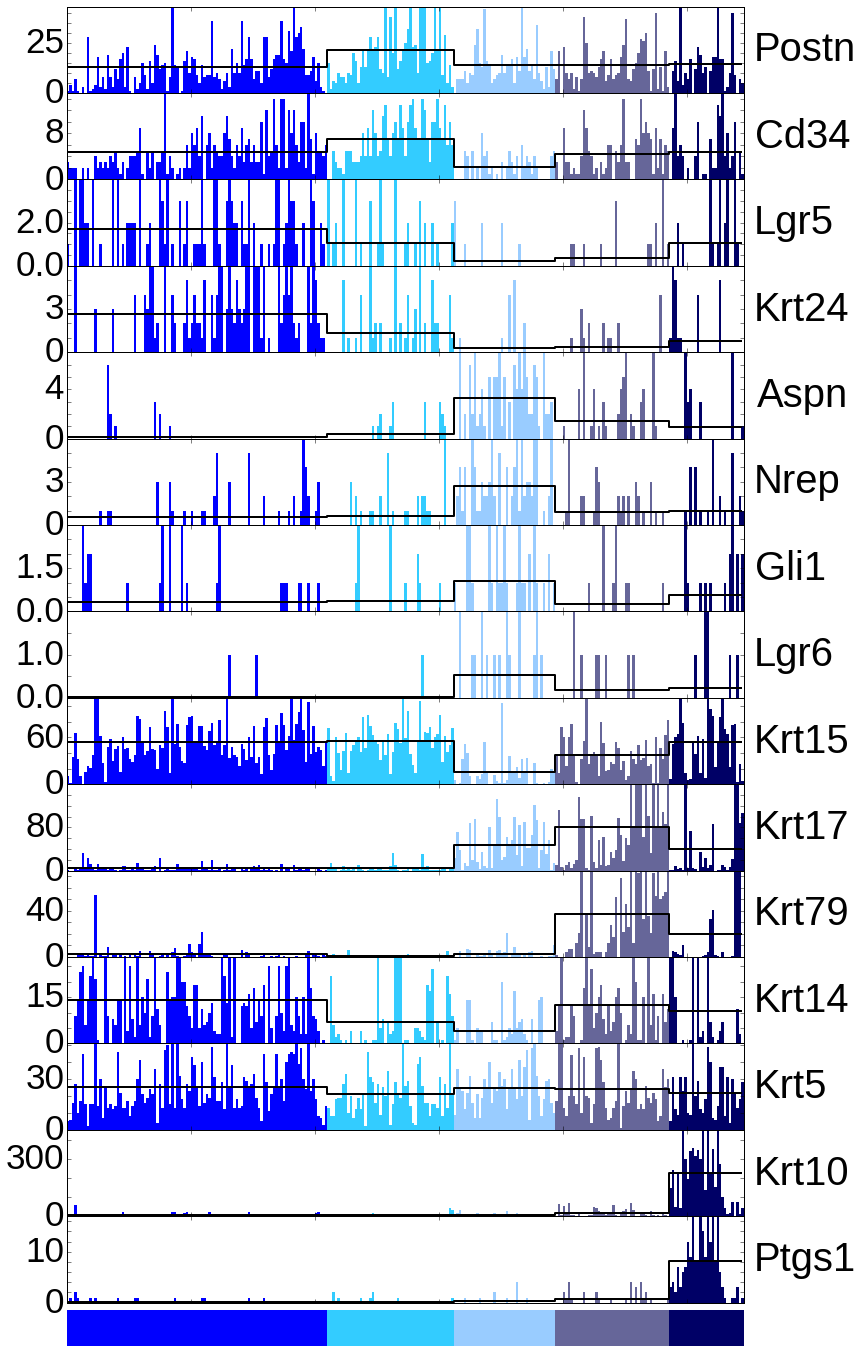

In [95]:
genes = genes_OB
cell_groups = s_groups_OB
dataset = seq[s_groups_OB.index]
cmap = cmap_OB

#create figure

bar_size = 0.5
bar_pad = 0.1
width = 10.0
height = len(genes) * 1.20 + (bar_size + bar_pad)

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 1, hspace = 0.00, wspace = 0.0, top = 1, right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = (bar_pad + bar_size) / height)

#create GS for sample group bar

gs0 = plt.GridSpec(1,1, left = (bar_pad + bar_size) / width, right = 1, top = bar_size / height,
                       bottom = 0, hspace = 0.0, wspace = 0.0)

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for g in genes:
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create axis
            
        ax0 = plt.subplot(gs1[genes.index(g)])
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticklabels([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = np.ceil(np.max(mean_tmp) * 2))
        ax0.set_ylabel(g, family = 'Liberation Sans', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Liberation Sans')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(35)
            else:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups)), [mean_tmp[val] for val in cell_groups], where = 'post', color = 'black', linewidth = 2)

ax1 = plt.subplot(gs0[0])

ax1.set_xlim(0, len(cell_groups))

for s_gr in enumerate(cell_groups):
    
    ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

remove_ticks(ax1, linewidth = 1)
clean_axis(ax1)

figname = 'v1.8_2_C_Markers_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers vs. Baseline 

In [141]:
genes_baseline_OB = neg_binom_extract_genes(NBR_2nd_size_bl, score = 'percentile - 25', number = 10)

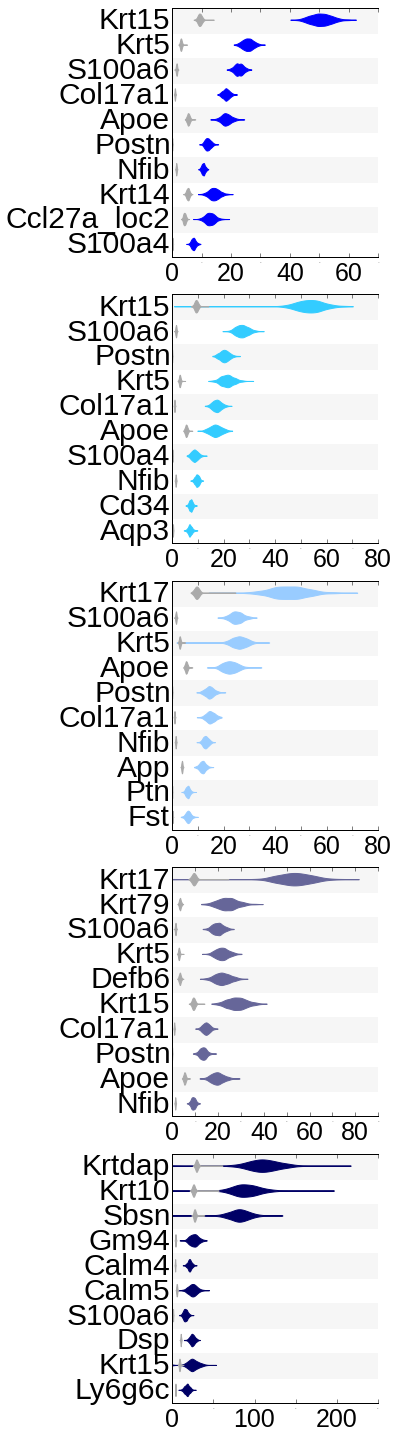

In [271]:
#define input variables

gr_order = return_unique(s_groups_OB)
genes = genes_baseline_OB
L = len(genes.index)
traces = NBR_2nd_traces
cmap = cmap_OB
to_2nd = OB_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_E_Markers_vs_Baseline_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers vs. other groups

In [67]:
NBR_2nd_bin_gr_OB, NBR_2nd_size_gr_OB = neg_binom_vs_groups_v1P(NBR_2nd_summary[['15','16','17','18','19','Baseline']], dview, PP='95')

In [146]:
genes_groups_OB = neg_binom_extract_genes(NBR_2nd_size_gr_OB, score = 'percentile - 25', number = 10)

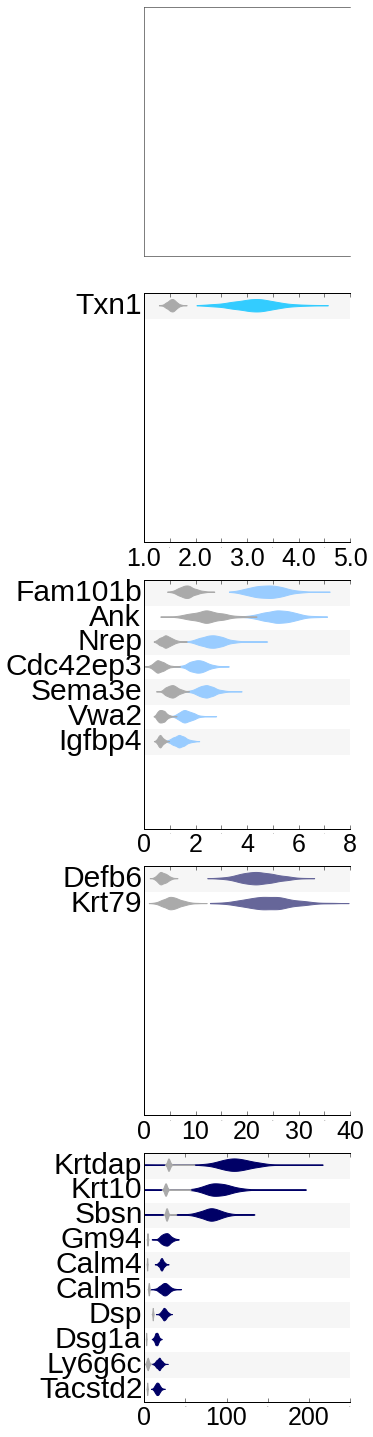

In [272]:
#define input variables

gr_order = return_unique(s_groups_OB)
genes = genes_groups_OB
L = len(genes.index)
traces = NBR_2nd_traces
summary = NBR_2nd_summary[['15','16','17','18','19','Baseline']]
cmap = cmap_OB
to_2nd = OB_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_sec = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_sec]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_E_Markers_vs_Groups_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Robustness

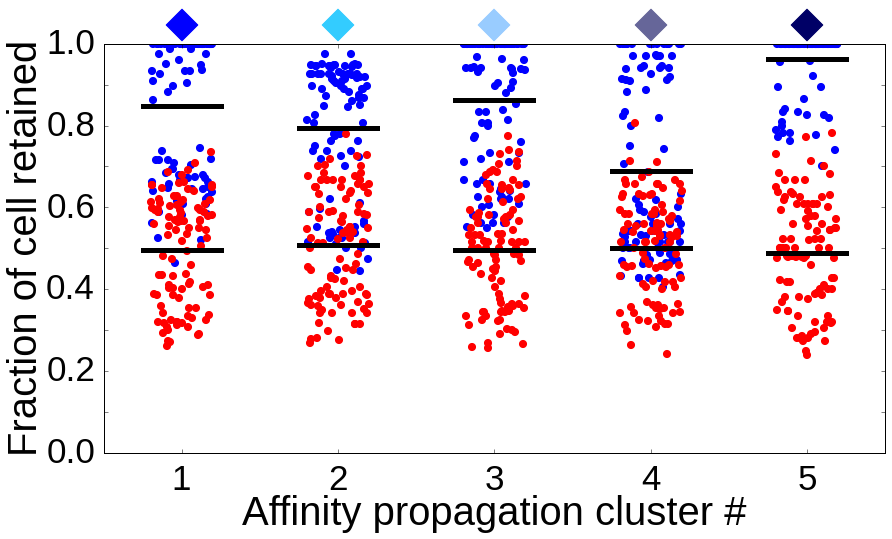

In [288]:
robustness = robustness_OB
robustness_null = robustness_OB_null
cell_groups = s_groups_OB
cmap = cmap_OB

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14, 8))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax.set_xticks(range(len(set(cell_groups))))
ax.set_xticklabels(np.arange(0, len(set(cell_groups))) + 1, family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Affinity propagation cluster #', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Fraction of cell retained', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.075, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness[str(gr)],
               s = 50, 
               color = 'blue')
    
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
       
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness_null[str(gr)],
               s = 50, 
               color = 'red')
        
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness_null[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
    
#plot color symbols

ax_Sym = plt.subplot(gs[0])

ax_Sym.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax_Sym.set_ylim(-0.5, 0.5)

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax_Sym.scatter(ix,
               0.0,
               marker = 'D',
               s = 500,
               color = cmap[gr])
    
clean_axis(ax_Sym)

figname = 'v1.8_S3_I_Robustness_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

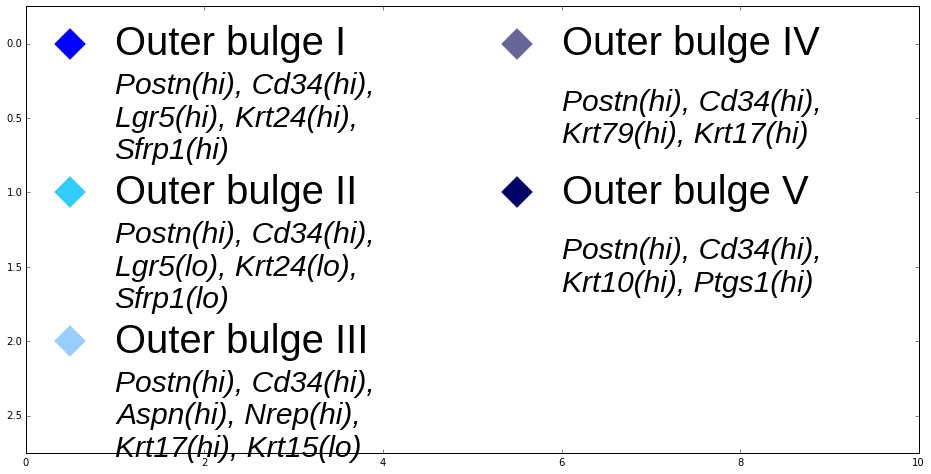

In [231]:
cell_groups = s_groups_OB
group_pos = [(0.5,0),(0.5,1),(0.5,2),(5.5,0),(5.5,1),(5.5,2)]
cmap = cmap_OB
nmap = nmap_OB
nmap_genes = gmap_OB

#initialize figure

width = 16
height = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax0 = plt.subplot()
ax0.set_ylim(2.75, -0.25)
ax0.set_xlim(0, 10)

group_list = return_unique(cell_groups)

for pos, gr in enumerate(group_list):
    
    pos_tmp = group_pos[pos]
    
    ax0.scatter(pos_tmp[0], pos_tmp[1], c = cmap[gr], marker = 'D', vmin = 0, vmax = 1.0, s = 500, 
                linewidth = 0.0, edgecolor = cmap[gr])
        
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1], nmap[gr], family = 'Liberation Sans', 
             fontsize = 40, va = 'center', ha = 'left')
    
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1] + 0.5, nmap_genes[group_list[pos]], 
             fontsize = 30, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')

#clean_axis(ax0)

figname = 'v1.8_2_C_Legend_OB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Inner bulge

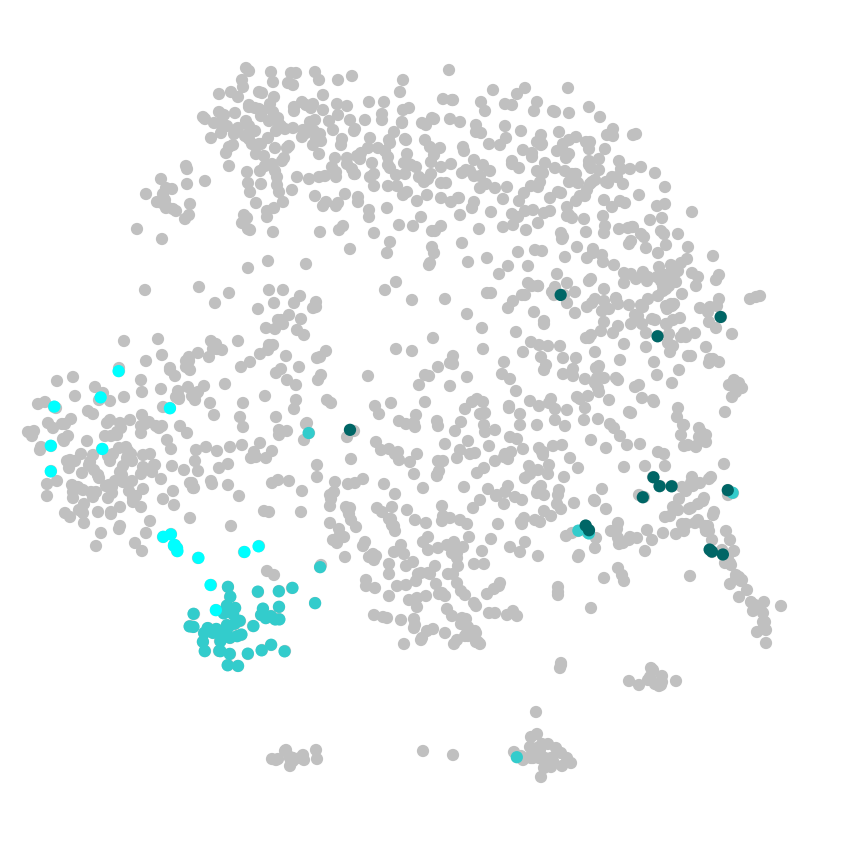

In [311]:
tsne = tsne_1st
cell_groups = s_groups_IB
cmap = cmap_IB

#initialize figure

height = 15
width = 15

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - 1, x_max + 3)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - 1, x_max * (y_diff/x_diff) + 3)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

ix_sel = cell_groups.index

#draw groups in background

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

ax1.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

clist_tsne = [cmap[cell_groups[ix]] for ix in ix_sel]

ax1.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 150,
            linewidth = 0.0,
            c = clist_tsne,
            edgecolors = clist_tsne)

clean_axis(ax1)

figname = 'v1.8_2_D_t-SNE_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

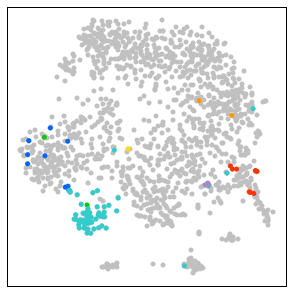

In [312]:
#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

clist_tsne_inset = [cmap_1st[s_groups_1st[ix]] for ix in ix_sel]

ax_inset.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)


ax_inset.scatter(tsne.ix[ix_sel, 'x'],
                tsne.ix[ix_sel, 'y'], 
                s = 25,
                linewidth = 0.0,
                c = clist_tsne_inset,
                edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(1)
    
figname = 'v1.8_S3_A_t-SNE_IB_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Heatmap

In [153]:
#Transfer the expression data to relative values (0 [min] - 1 [max])

seq_sel_IB = log2Transform(seq).ix[g_groups_IB.index, s_groups_IB.index]
seq_sel_IB = seq_sel_IB.apply(lambda x: x / max(x), axis = 1)


Calculating binary logarithm of x + 1


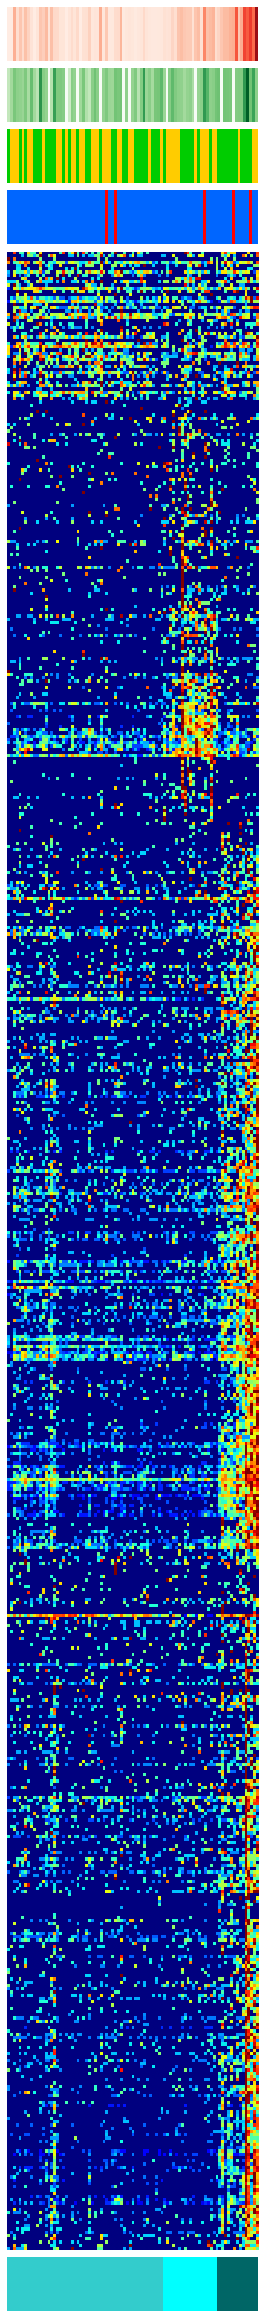

In [266]:
dataset = seq_sel_IB
cell_groups = s_groups_IB
gene_groups = g_groups_IB
cmap = cmap_IB

#create figure

bar_size = 0.75 #size of group and metadata bars
bar_pad = 0.1 #pad size of group and metadata bars
width = 0.04 * len(dataset.columns)
height = 32.0
#height = ((width - bar_size) / len(s_groups)) * len(g_groups) + 5 * bar_size

plt.figure(figsize=(width, height), facecolor = 'w')

#generate main axes

axHM = plt.axes()
axHM.set_position([0.00, 0.00, 1.0, 1.0])


#plot heatmap

axHM.matshow(dataset,
             cmap = plt.cm.jet,
             aspect = 'auto',
             interpolation = 'nearest',
             vmin = 0,
             vmax = 1)

remove_ticks(axHM, linewidth = 1)
clean_axis(axHM)

#create axes divider

divider = make_axes_locatable(axHM)

#draw cell/sample groups

axSG = divider.append_axes("bottom", size= bar_size, pad=bar_pad)

axSG.set_xlim(0, len(cell_groups))

for pos, gr in enumerate(cell_groups):
    axSG.axvspan(pos, pos+1, color=cmap[gr])

remove_ticks(axSG, linewidth = 1)
clean_axis(axSG)

#draw Sca1 metadata

axSCA = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSCA.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axSCA.axvspan(pos, pos+1, color=cmap_Sca1[meta.ix['green_flag', ix]])

remove_ticks(axSCA, linewidth = 1)
clean_axis(axSCA)

#draw hair cycle metadata

axHC = divider.append_axes("top", size= bar_size, pad=bar_pad)

axHC.set_xlim(0, len(cell_groups))

for pos, ix in enumerate(cell_groups.index):
    axHC.axvspan(pos, pos+1, color=cmap_hair_cycle[meta.ix['hair_cycle_stage', ix]])

remove_ticks(axHC, linewidth = 1)
clean_axis(axHC)

#draw cell size metadata

axSIZE = divider.append_axes("top", size= bar_size, pad=bar_pad)

axSIZE.set_xlim(0, len(cell_groups))

cmapSIZE = plt.cm.Greens
SIZE_max = meta.ix['diameter(um)', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['diameter(um)', ix])
    axSIZE.axvspan(pos, pos+1, color=cmapSIZE(val/SIZE_max))


remove_ticks(axSIZE, linewidth = 1)
clean_axis(axSIZE)

#draw transcript metadata

axTRANS = divider.append_axes("top", size= bar_size, pad=bar_pad)

axTRANS.set_xlim(0, len(cell_groups))

cmapTRANS = plt.cm.Reds
TRANS_max = meta.ix['sum_transcripts', s_groups_1st.index].astype(float).max()

for pos, ix in enumerate(cell_groups.index):
    val = float(meta.ix['sum_transcripts', ix])
    axTRANS.axvspan(pos, pos + 1, color = cmapTRANS(val / TRANS_max))

remove_ticks(axTRANS, linewidth = 1)
clean_axis(axTRANS)


figname = 'v1.8_S3_B_Heatmap_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Barplots

In [223]:
genes_IB = ['Krt6a','Krt75','Timp3','Fgf18','Wfdc3','Lima1','Foxp1','S100a6','Postn','Cd34','Krt10','Ptgs1']

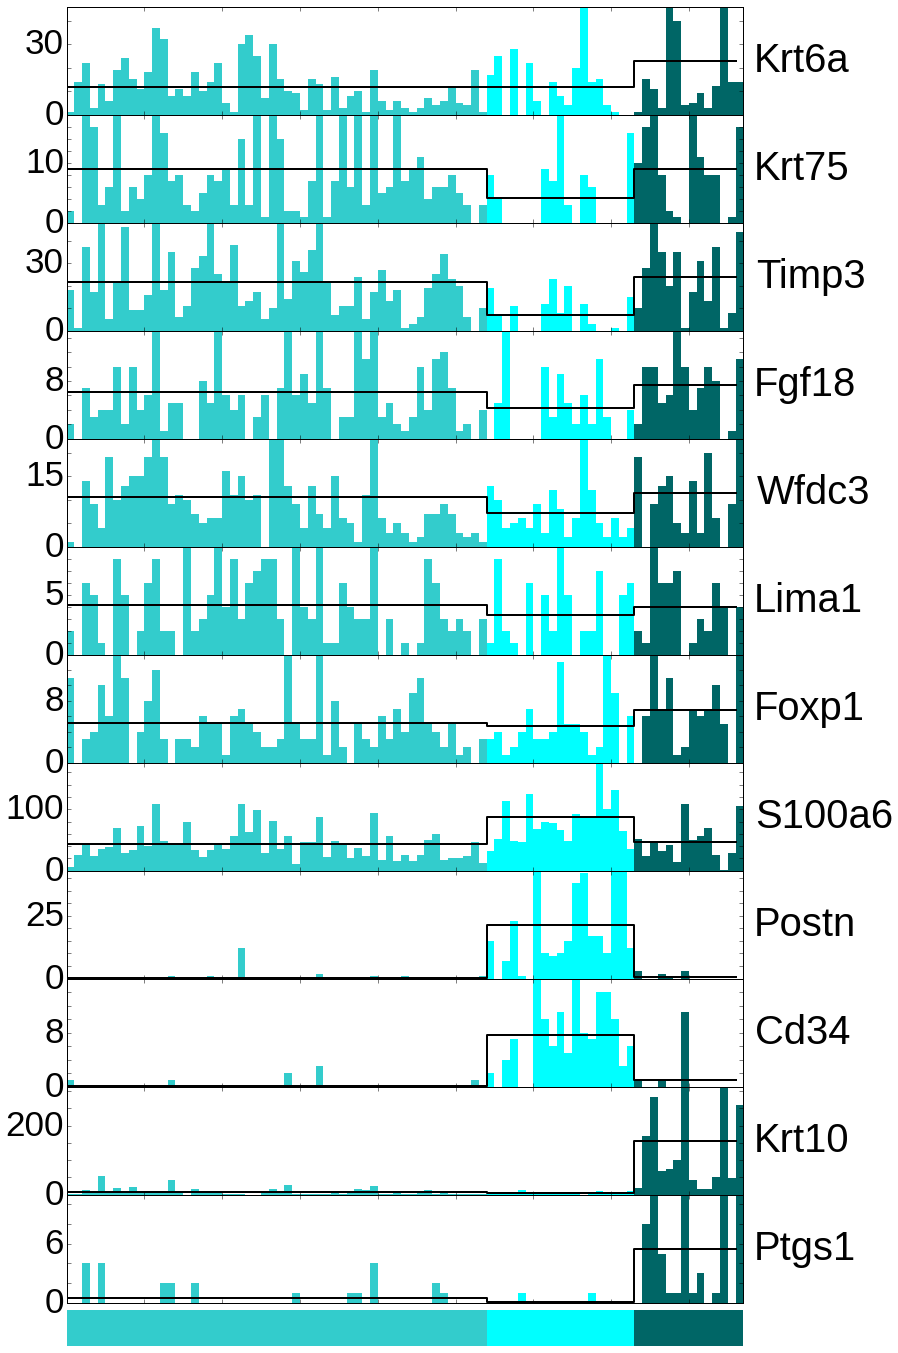

In [227]:
genes = genes_IB
cell_groups = s_groups_IB
dataset = seq[s_groups_IB.index]
cmap = cmap_IB

#create figure

bar_size = 0.5
bar_pad = 0.1
width = 10.0
height = len(genes) * 1.5 + (bar_size + bar_pad)

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 1, hspace = 0.00, wspace = 0.0, top = 1, right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = (bar_pad + bar_size) / height)

#create GS for sample group bar

gs0 = plt.GridSpec(1,1, left = (bar_pad + bar_size) / width, right = 1, top = bar_size / height,
                       bottom = 0, hspace = 0.0, wspace = 0.0)

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for g in genes:
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create axis
            
        ax0 = plt.subplot(gs1[genes.index(g)])
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticklabels([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = np.ceil(np.max(mean_tmp) * 2))
        ax0.set_ylabel(g, family = 'Liberation Sans', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Liberation Sans')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(35)
            else:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups)), [mean_tmp[val] for val in cell_groups], where = 'post', color = 'black', linewidth = 2)

ax1 = plt.subplot(gs0[0])

ax1.set_xlim(0, len(cell_groups))

for s_gr in enumerate(cell_groups):
    
    ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

remove_ticks(ax1, linewidth = 1)
clean_axis(ax1)

figname = 'v1.8_2_D_Markers_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers vs. Baseline

In [158]:
genes_baseline_IB = neg_binom_extract_genes(NBR_2nd_size_bl, score = 'percentile - 25', number = 10)

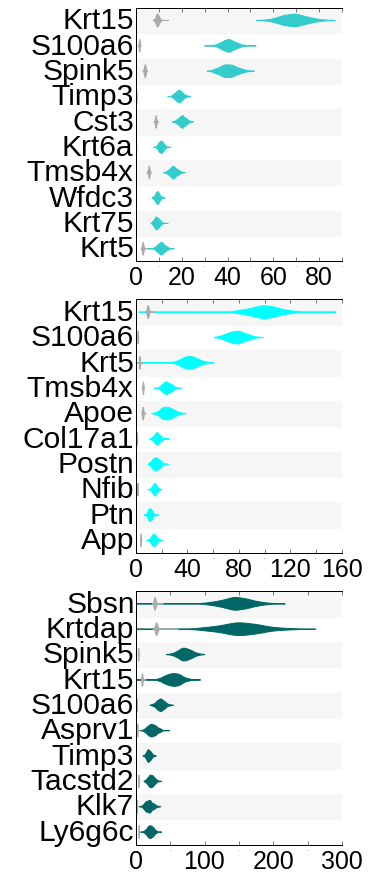

In [275]:
#define input variables

gr_order = return_unique(s_groups_IB)
genes = genes_baseline_IB
L = len(genes.index)
traces = NBR_2nd_traces
cmap = cmap_IB
to_2nd = IB_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)


figname = 'v1.8_S3_F_Markers_vs_Baseline_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Markers vs. other groups

In [68]:
NBR_2nd_bin_gr_IB, NBR_2nd_size_gr_IB = neg_binom_vs_groups_v1P(NBR_2nd_summary[['20','21','22','Baseline']], dview, PP='95')

In [163]:
genes_groups_IB = neg_binom_extract_genes(NBR_2nd_size_gr_IB, score = 'percentile - 25', number = 10)

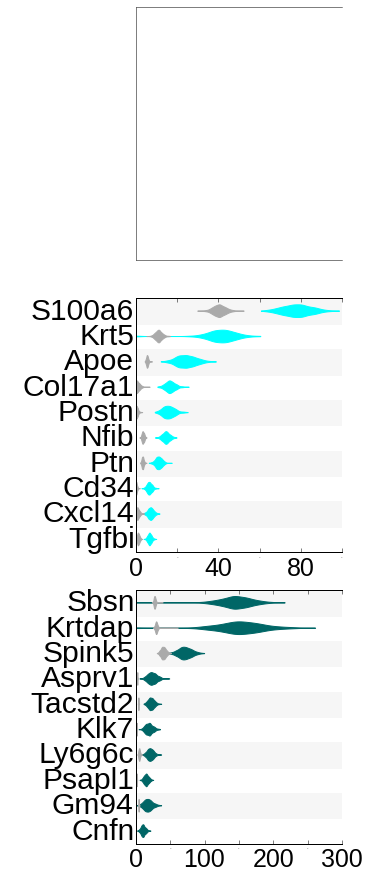

In [274]:
#define input variables

gr_order = return_unique(s_groups_IB)
genes = genes_groups_IB
L = len(genes.index)
traces = NBR_2nd_traces
summary = NBR_2nd_summary[['20','21','22','Baseline']]
cmap = cmap_IB
to_2nd = IB_to_2nd

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    gr_2nd = to_2nd[gr]
    
    genes_tmp = [gene for gene in genes[str(gr_2nd)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#F6F6F6', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr_2nd)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_sec = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_sec]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#AAAAAA')
            v.set_facecolor('#AAAAAA')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S3_F_Markers_vs_Groups_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Robustness

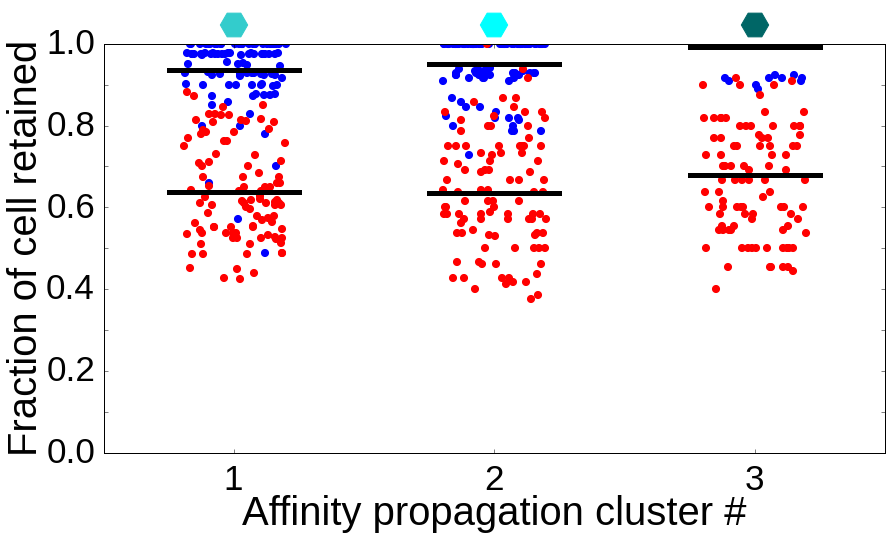

In [292]:
robustness = robustness_IB
robustness_null = robustness_IB_null
cell_groups = s_groups_IB
cmap = cmap_IB

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14, 8))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax.set_xticks(range(len(set(cell_groups))))
ax.set_xticklabels(np.arange(0, len(set(cell_groups))) + 1, family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Affinity propagation cluster #', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0], family = 'Liberation Sans', fontsize = 35)
ax.set_ylabel('Fraction of cell retained', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.075, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness[str(gr)],
               s = 50, 
               color = 'blue')
    
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
       
    ax.scatter([ix - (np.random.random() * 0.4 - 0.2) for pos in robustness[str(gr)]],
               robustness_null[str(gr)],
               s = 50, 
               color = 'red')
        
    ax.plot([ix - 0.25, ix + 0.25],
            [np.mean(robustness_null[str(gr)])] * 2,
            linewidth = 5,
            color = 'black')
    
#plot color symbols

ax_Sym = plt.subplot(gs[0])

ax_Sym.set_xlim(- 0.5, len(set(cell_groups)) - 0.5)
ax_Sym.set_ylim(-0.5, 0.5)

for ix, gr in enumerate(return_unique(cell_groups)):
    
    ax_Sym.scatter(ix,
               0.0,
               marker = 'H',
               s = 750,
               color = cmap[gr])
    
clean_axis(ax_Sym)

figname = 'v1.8_S3_J_Robustness_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

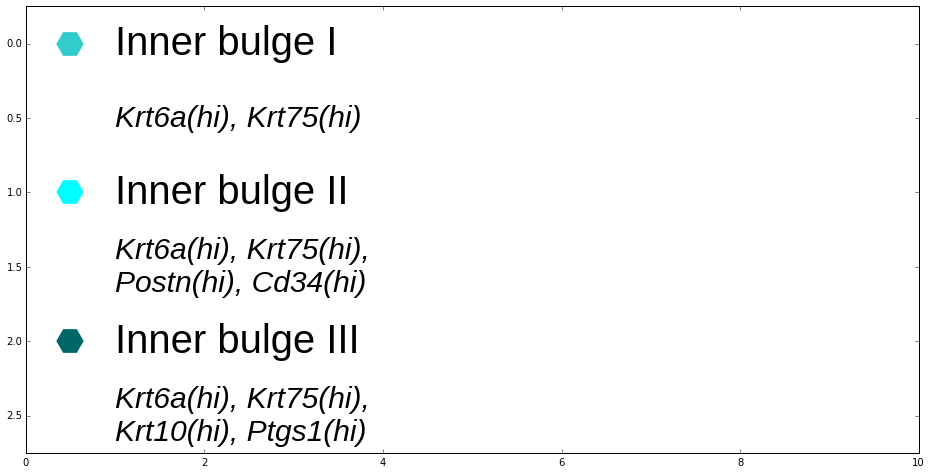

In [230]:
cell_groups = s_groups_IB
group_pos = [(0.5,0),(0.5,1),(0.5,2),(5.5,0),(5.5,1),(5.5,2)]
cmap = cmap_IB
nmap = nmap_IB
nmap_genes = gmap_IB

#initialize figure

width = 16
height = 8

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax0 = plt.subplot()
ax0.set_ylim(2.75, -0.25)
ax0.set_xlim(0, 10)

group_list = return_unique(cell_groups)

for pos, gr in enumerate(group_list):
    
    pos_tmp = group_pos[pos]
    
    ax0.scatter(pos_tmp[0], pos_tmp[1], c = cmap[gr], marker = 'H', vmin = 0, vmax = 1.0, s = 750, 
                linewidth = 0.0, edgecolor = cmap[gr])
        
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1], nmap[gr], family = 'Liberation Sans', 
             fontsize = 40, va = 'center', ha = 'left')
    
    ax0.text(pos_tmp[0] + 0.5, pos_tmp[1] + 0.5, nmap_genes[group_list[pos]], 
             fontsize = 30, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')

#clean_axis(ax0)

figname = 'v1.8_2_D_Legend_IB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Wards linkage

In [49]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')

In [50]:
seq_sel = dropNull(seq[s_groups_2nd[s_groups_2nd.isin([0,1,2,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22])].index], path_input, drop_spikes=True, drop_repeats=True, cutoff_mean=0.05)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [51]:
seq_sel = log2Transform(seq_sel)


Calculating binary logarithm of x + 1


In [52]:
groups_sel = [0,1,2,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22]

#calculate group averages

group_avg = pd.DataFrame(index = seq_sel.index, columns = set(groups_sel))

for gr in groups_sel:
    
    ix_tmp = s_groups_2nd[s_groups_2nd==gr].index
    
    group_avg_tmp = seq_sel[ix_tmp].mean(axis=1)
    
    group_avg[gr] = group_avg_tmp

In [53]:
#create group distance matrix

group_avg_dist = 1 - group_avg.corr()

In [54]:
#create single-linkage clustering

seq_cluster = scipy.cluster.hierarchy.ward(group_avg_dist)

"\nfigname = 'v1.7_S7_H_Wards_linkage.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

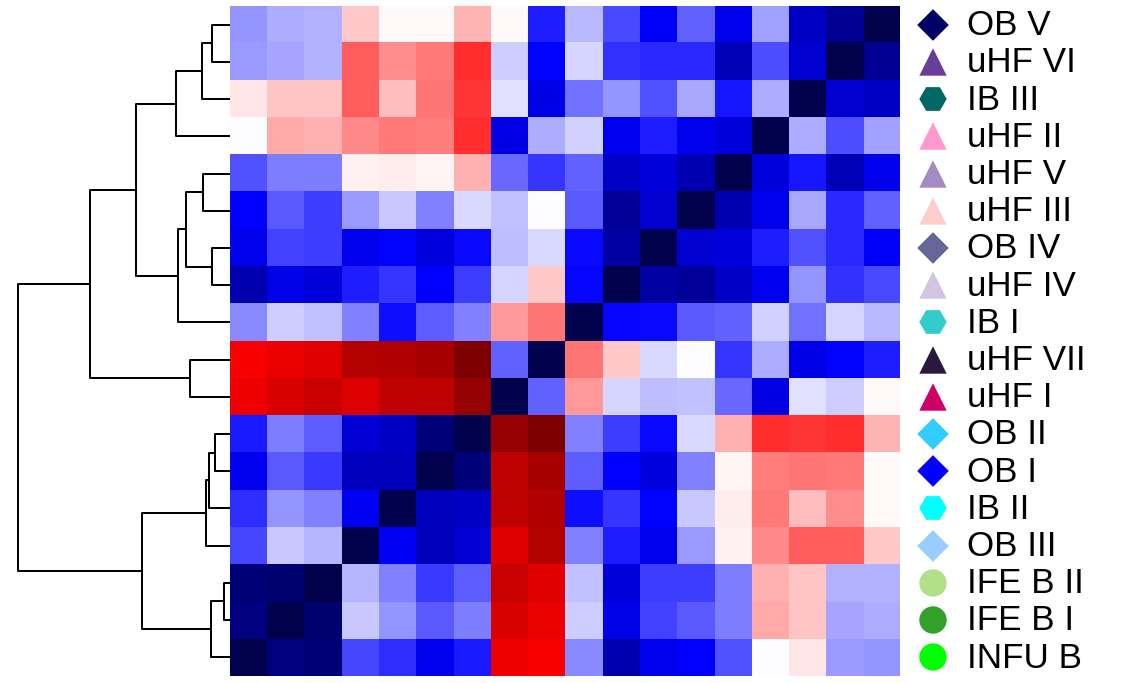

In [55]:
cmap = cmap_2nd
nmap_short = nmap_2nd_short

#create figure and GridSpec

height = 12
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))
heatmapGS = plt.GridSpec(1,3,wspace=0.0,hspace=0.0,width_ratios=[4,12,4])

#create dendogramm

ax_dend = fig.add_subplot(heatmapGS[0])
den = sch.dendrogram(seq_cluster,color_threshold=np.inf, orientation='right')
leaves = den['leaves']

lines = ax_dend.get_children()[2]
lines.set_color('black')
lines.set_linewidth(2)
    
clean_axis(ax_dend)

#create heatmap

ax_hm = fig.add_subplot(heatmapGS[1])
ordered = [group_avg_dist.columns[ix] for ix in leaves]
data_hm = group_avg_dist.ix[ordered, ordered]
ax_hm.matshow(data_hm,interpolation='nearest',aspect='auto',origin='lower',cmap=plt.cm.seismic, vmin = 0.0, vmax = 0.35)
remove_ticks(ax_hm)
clean_axis(ax_hm)

#create labels
ax_label = fig.add_subplot(heatmapGS[2])

ax_label.set_ylim(bottom = 0, top = len(leaves))
ax_label.set_xlim(left = 0, right = 10)

for pos, ix in enumerate(leaves):

    ax_label.scatter(x = 1.5,
                     y = pos + 0.5,
                     c = cmap[group_avg_dist.columns[ix]],
                     linewidth = 0.0,
                     s = markers_2nd_size[group_avg_dist.columns[ix]],
                     marker = markers_2nd[group_avg_dist.columns[ix]])
    
    ax_label.text(x = 3, 
                  y = pos + 0.5, 
                  s = nmap_short[group_avg_dist.columns[ix]], 
                  family = 'Liberation Sans', 
                  size = 35, 
                  va = 'center')

clean_axis(ax_label)
"""
figname = 'v1.7_S7_H_Wards_linkage.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

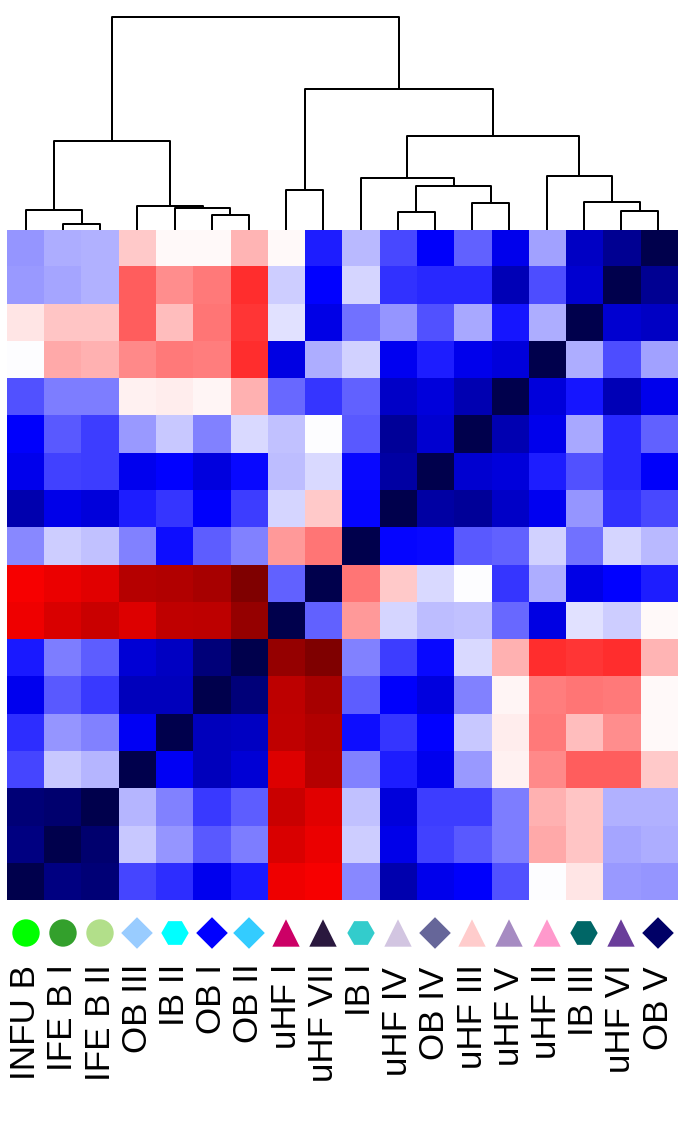

In [56]:
cmap = cmap_2nd
nmap_short = nmap_2nd_short

#create figure and GridSpec

height = 20
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))
heatmapGS = plt.GridSpec(3,1,wspace=0.0,hspace=0.0,height_ratios=[4,12,4])

#create dendogramm

ax_dend = fig.add_subplot(heatmapGS[0])
den = sch.dendrogram(seq_cluster,color_threshold=np.inf, orientation='top')
leaves = den['leaves']

lines = ax_dend.get_children()[2]
lines.set_color('black')
lines.set_linewidth(2)
    
clean_axis(ax_dend)

#create heatmap

ax_hm = fig.add_subplot(heatmapGS[1])
ordered = [group_avg_dist.columns[ix] for ix in leaves]
data_hm = group_avg_dist.ix[ordered, ordered]
ax_hm.matshow(data_hm,interpolation='nearest',aspect='auto',origin='lower',cmap=plt.cm.seismic, vmin = 0.0, vmax = 0.35)
remove_ticks(ax_hm)
clean_axis(ax_hm)

#create labels
ax_label = fig.add_subplot(heatmapGS[2])

ax_label.set_xlim(0, len(leaves))
ax_label.set_ylim(10, 0)

for pos, ix in enumerate(leaves):

    ax_label.scatter(y = 1.5,
                     x = pos + 0.5,
                     c = cmap[group_avg_dist.columns[ix]],
                     linewidth = 0.0,
                     s = markers_2nd_size[group_avg_dist.columns[ix]],
                     marker = markers_2nd[group_avg_dist.columns[ix]])
    
    ax_label.text(y = 3, 
                  x = pos + 0.5, 
                  s = nmap_short[group_avg_dist.columns[ix]], 
                  family = 'Liberation Sans', 
                  size = 35, 
                  va = 'top', ha = 'center', rotation = 'vertical')

clean_axis(ax_label)

figname = 'v1.8_S3_K_2nd_level_Wards_linkage.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

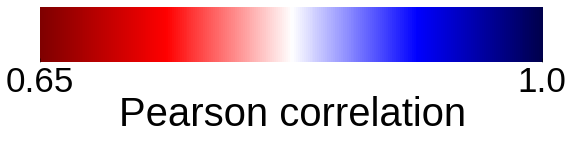

In [302]:
cmap = plt.cm.seismic_r

#initialize figure

height = 1
width = 9

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.matshow(np.matrix(np.arange(0.0, 1.0, 0.001)),
                cmap = cmap, aspect = 'auto', vmin = 0.0, vmax = 1.0)

clean_axis(axLabel)

axLabel.yaxis.set_ticks([])
axLabel.xaxis.set_ticks_position('bottom')
axLabel.set_xticks([axLabel.get_xlim()[0], axLabel.get_xlim()[1]])
axLabel.set_xticklabels(['0.65','1.0'], family = 'Liberation Sans', fontsize = 35, va = 'center')
plt.rcParams['xtick.major.pad'] = 20

axLabel.set_xlabel('Pearson correlation', family = 'Liberation Sans', fontsize = 40)
axLabel.xaxis.set_label_coords(0.5, -0.6)

figname = 'v1.8_S3_K_Legend_correlation.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Combined legends

In [31]:
nmap_2nd = {0:'Interfollicular basal I',
            1:'Interfollicular basal II',
            2:'Infundibular basal',
            3:'IFE differentiated cells I',
            4:'IFE differentiated cells II',
            5:'IFE keratinized layer I',
            6:'IFE keratinized layer II',
            7:'upper HF I',
            8:'upper HF II',
            9:'upper HF III',
            10:'upper HF IV',
            11:'upper HF V',
            12:'upper HF VI',
            13:'upper HF VII',
            14:'Sebaceous gland (SG)',
            15:'Outer bulge I',
            16:'Outer bulge II',
            17:'Outer bulge III',
            18:'Outer bulge IV',
            19:'Outer bulge V',
            20:'Inner bulge I',
            21:'Inner bulge II',
            22:'Inner bulge III',
            23:'T cells (TC)',
            24:'Langerhans cells (LH)'}

In [32]:
gmap_2nd = {0:'Krt14(hi), Krt5(hi), Mt2(hi), Fth1(hi),\nThbs1(hi)',
            1:'Krt14(dim), Krt5(dim), Mt2(dim), Fth1(dim),\nThbs1(lo)',
            2:'Krt14(dim), Krt5(dim), Mt2(dim), Fth1(dim),\nSostdc1(hi), Aqp3(hi), Fst(hi), Postn(dim)',
            3:'Krt10(dim), Ptgs1(dim)',
            4:'Krt10(hi), Ptgs1(hi)',
            5:'Lor(dim), Flg2(dim)',
            6:'Lor(hi), Flg2(hi)',
            7:'Krt79(hi), Krt17(hi), Defb6(hi),\nCst6(hi), Klk10(hi), Cryab(hi)',
            8:'Krt79(hi), Krt17(hi), Defb6(hi), Cst6(dim)\nKrt14(dim), Lrig1(+), Krt5(lo), Ptn(lo)',
            9:'Krt79(dim), Krt17(dim), Defb6(lo), Cst6(lo),\nKrt14(dim), Lrig1(+), Krt5(lo), Ptn(lo)',
            10:'Krt79(lo), Krt17(lo), Krt14(dim), Lrig1(+)\nKrt5(dim), Ptn(dim)',
            11:'Krt79(hi), Krt17(hi), Krt14(dim), Krt5(dim),\nKrt10(dim), Ptgs1(dim)',
            12:'Krt79(hi), Krt17(hi), Krt10(hi), Ptgs1(hi)',
            13:'Krt79(hi), Krt17(hi),\nLor(hi), Flg2(hi)',
            14:'Mgst1(hi), Scd1(hi)',
            15:'Postn(hi), Cd34(hi), Lgr5(hi), Krt24(hi),\nSfrp1(hi)',
            16:'Postn(hi), Cd34(hi), Lgr5(dim), Krt24(dim),\nSfrp1(dim)',
            17:'Postn(hi), Cd34(hi), Aspn(hi), Nrep(hi),\nKrt17(dim), Krt15(lo)',
            18:'Postn(hi), Cd34(hi), Krt79(dim), Krt17(dim)',
            19:'Postn(hi), Cd34(hi), Krt10(hi), Ptgs1(hi)',
            20:'Krt6a(hi), Krt75(hi)',
            21:'Krt6a(hi), Krt75(hi), Postn(hi), Cd34(hi)',
            22:'Krt6a(hi), Krt75(hi), Krt10(hi), Ptgs1(hi)',
            23:'Cd3(hi), Thy1(hi)',
            24:'Cd207(hi), Ctss(hi)'}

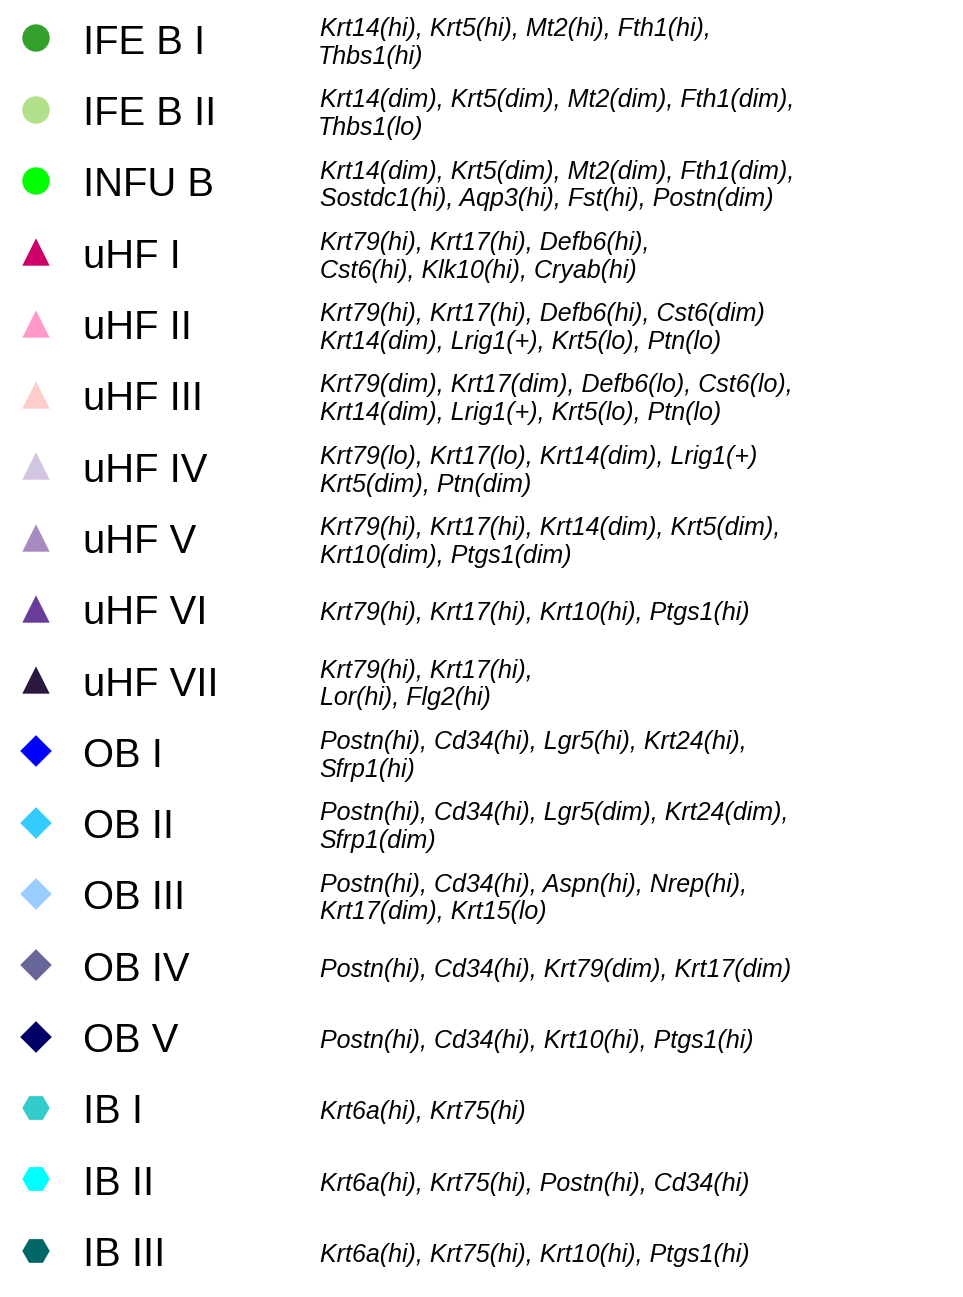

In [48]:
#initialize figure

width = 17
height = 23

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

group_list = [0,1,2,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22]

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(len(group_list) - 0.5, -0.5)
ax0.set_xlim(0, 1)

x = 0.03

for pos, gr in enumerate(group_list):      
    
    ax0.scatter(x, pos - 0.05, 
                c = cmap_2nd[gr], 
                marker = markers_2nd[gr], 
                s = markers_2nd_size[gr], 
                linewidth = 0.0)
    
    ax0.text(x + 0.03, pos, nmap_2nd[gr], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
            
    ax0.text(x + 0.45, pos, gmap_2nd[gr], fontsize = 25, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')
    
clean_axis(ax0)

figname = 'v1.8_2_Legend_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [ ]:
#initialize figure

width = 17
height = 23

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

group_list = [0,1,2,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22]

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(len(group_list) - 0.5, -0.5)
ax0.set_xlim(0, 1)

x = 0.03

for pos, gr in enumerate(group_list):      
    
    ax0.scatter(x, pos - 0.05, 
                c = cmap_2nd[gr], 
                marker = markers_2nd[gr], 
                s = markers_2nd_size[gr], 
                linewidth = 0.0)
    
    ax0.text(x + 0.05, pos, nmap_2nd_short[gr], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
            
    ax0.text(x + 0.3, pos, gmap_2nd[gr], fontsize = 25, family = 'Liberation Sans', va = 'center', ha = 'left',
             fontstyle = 'italic')
    
clean_axis(ax0)

figname = 'v1.8_2_Legend_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# t-SNE with all keratinocytes marked

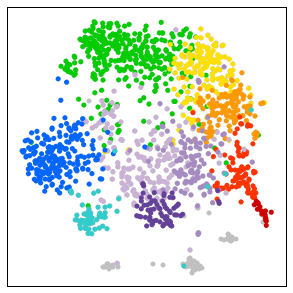

In [313]:
#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

ix_sel = s_groups_1st[~s_groups_1st.isin([5,11,12])].index
clist_tsne_inset = [cmap_1st[s_groups_1st[ix]] for ix in ix_sel]

ax_inset.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)


ax_inset.scatter(tsne.ix[ix_sel, 'x'],
                tsne.ix[ix_sel, 'y'], 
                s = 25,
                linewidth = 0.0,
                c = clist_tsne_inset,
                edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(1)
    
figname = 'v1.8_S3_A_t-SNE_kerats_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Save 2nd level neg. binominal regression data to txt file

In [62]:
seq_ = dropNull(seq, path_input, cutoff_mean = 0.00)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [64]:
groups_sel = [0,1,2,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22]

In [77]:
m_ix1, m_ix2 = [],[]

for gr in groups_sel:
    m_ix1 += [nmap_2nd_short[gr]] * 2
    m_ix2 += ['vs Baseline','vs other groups']
    
NBR_2nd_excel = pd.DataFrame(index = seq_.index, columns = [np.array(m_ix1), np.array(m_ix2)])

ix_sel = NBR_2nd_size_bl.index.levels[0]

for gr in groups_sel:
    
    NBR_2nd_excel[nmap_2nd_short[gr], 'vs Baseline'].ix[ix_sel] = NBR_2nd_size_bl.swaplevel(0,1).ix['percentile - 25'].ix[ix_sel][str(gr)]

subsets = [[0,1,2, NBR_2nd_size_gr_IFE_b],
           [7,8,9,10,11,12,13,NBR_2nd_size_gr_uHF],
           [15,16,17,18,19,NBR_2nd_size_gr_OB],
           [20,21,22,NBR_2nd_size_gr_IB]]
    
for s in subsets:
    
    data_tmp = s[-1]
    
    for gr in s[:-1]:
        
        NBR_2nd_excel[nmap_2nd_short[gr], 'vs other groups'].ix[ix_sel] = data_tmp.swaplevel(0,1).ix['percentile - 25'].ix[ix_sel][str(gr)]
    
NBR_2nd_excel[NBR_2nd_excel=='n.s'] = 'n.s.'
NBR_2nd_excel = NBR_2nd_excel.fillna('b.c.')

In [89]:
#saveData_v1(NBR_2nd_excel, path_output, exp_id, 'NBR_2nd_excel')

# n = 19 experiment

In [236]:
def get_random_no_mice(ix, cells_all, meta, no_mice_emp, repeats = 1000):
    
    #get Sca1+ and Sca1- mouse pools for sampling
    
    pool_Sca1_pos, pool_Sca1_neg = [],[]
    
    for c in cells_all.index:
        
        if meta.ix['cell_fraction', c] == 'Sca1+':
            pool_Sca1_pos += [meta.ix['mouse_number',c]]
            
        elif meta.ix['cell_fraction', c] == 'Sca1-':
            pool_Sca1_neg += [meta.ix['mouse_number',c]]
                        
    #get cells for ix
        
    ix_sel = cells_all[cells_all==ix].index
                
    #get no of Sca1+ and Sca1- cells for ix
    
    tmp = Counter(meta.ix['cell_fraction', ix_sel])
    no_Sca1_pos, no_Sca1_neg = tmp['Sca1+'], tmp['Sca1-']
    
    #define output
    
    no_mice = []
        
    #iterate over repeats
    
    for r in range(repeats):
        
        #sample mice from Sca1+, Sca1- pools according to number of Sca1+, Sca1- cells
        
        tmp = list(np.random.choice(pool_Sca1_pos, no_Sca1_pos)) + list(np.random.choice(pool_Sca1_neg, no_Sca1_neg))
        
        no_mice += [len(set(tmp))]
        
    #define average
    
    avg = np.mean(no_mice)
    
    #define one-sided p-val (probability that less mice make up group by chance compared to empirical value)
    
    pval = np.sum([val <= no_mice_emp for val in no_mice]) / float(len(no_mice))
    
    return avg, pval

In [237]:
#define DataFrame

n19 = pd.DataFrame(index = [nmap_2nd_short[ix] for ix in return_unique(s_groups_2nd)], 
                   columns = ['Sca1+ fraction','Number of cells','Number of mice','Number of mice if random','P-value'])

for ix in return_unique(s_groups_2nd):
    
    #put in data
    
    ix_sel = s_groups_2nd[s_groups_2nd==ix].index
    
    len_tmp = float(len(ix_sel))
    
    #% of Sca1+ fraction
    
    n19.ix[ix,'Sca1+ fraction'] = '%.1f %%' % (Counter(meta.ix['cell_fraction', ix_sel])['Sca1+'] / len_tmp * 100)
    
    #number of cells
    
    n19.ix[ix, 'Number of cells'] = '%s / %s' % (int(len_tmp), len(s_groups_2nd))
    
    #number of mice
    
    no_mice = len(set(meta.ix['mouse_number', ix_sel]))
    n19.ix[ix, 'Number of mice'] = '%s / %s' % (no_mice, len(set(meta.ix['mouse_number', s_groups_2nd.index])))
    
    #simulate randomly expected number of mice
    
    tmp = get_random_no_mice(ix, s_groups_2nd, meta, no_mice, repeats = 10000)
    n19.ix[ix, 'Number of mice if random'], n19.ix[ix, 'P-value'] = tmp[0], tmp[1]

In [238]:
n19

Sca1+ fraction Number of cells Number of mice  \
IFE B I          91.5 %       94 / 1422        10 / 19   
IFE B II         85.8 %      134 / 1422        14 / 19   
INFU B           48.9 %       94 / 1422        18 / 19   
IFE D I          45.0 %      140 / 1422        19 / 19   
IFE D II         30.9 %       97 / 1422        19 / 19   
IFE K I          21.1 %       57 / 1422        15 / 19   
IFE K II         35.7 %       14 / 1422        11 / 19   
uHF I             9.1 %       33 / 1422        13 / 19   
uHF II           11.1 %       36 / 1422        15 / 19   
uHF III          13.3 %       45 / 1422        14 / 19   
uHF IV           23.4 %      111 / 1422        19 / 19   
uHF V            15.2 %       79 / 1422        18 / 19   
uHF VI           10.8 %       37 / 1422        13 / 19   
uHF VII          13.0 %       23 / 1422        11 / 19   
SG                5.3 %       19 / 1422         8 / 19   
OB I             10.5 %      105 / 1422        17 / 19   
OB II             9.8 %       51 / 1422        16 / 19   
OB III            4.9 %       41 / 1422        17 / 19   
OB IV             6.5 %       46 / 1422        16 / 19   
OB V              6.7 %       30 / 1422        15 / 19   
IB I              7.4 %       54 / 1422        17 / 19   
IB II            15.8 %       19 / 1422         9 / 19   
IB III            0.0 %       14 / 1422         9 / 19   
TC                5.6 %       18 / 1422         9 / 19   
LH                9.7 %       31 / 1422        14 / 19   

         Number of mice if random P-value  
IFE B I                    13.262  0.0048  
IFE B II                  16.1884  0.0703  
INFU B                    18.3801  0.4925  
IFE D I                   18.8283       1  
IFE D II                  18.6522       1  
IFE K I                    17.631  0.0249  
IFE K II                   9.9098  0.9014  
uHF I                     14.9832  0.1343  
uHF II                    15.5009  0.4892  
uHF III                   16.6046  0.0438  
uHF IV                     18.759       1  
uHF V                     18.2344  0.5875  
uHF VI                    15.6275   0.053  
uHF VII                   13.0068  0.1333  
SG                        11.5436  0.0127  
OB I                      18.4682  0.0583  
OB II                     16.9137  0.3339  
OB III                    15.8208  0.9194  
OB IV                     16.3727  0.5234  
OB V                      14.3382  0.7982  
IB I                       17.026  0.6533  
IB II                     11.8405  0.0414  
IB III                     9.4873  0.5027  
TC                        11.2335  0.0952  
LH                        14.6619   0.445

## n = 19 visualization

In [243]:
mice = list(set(meta.ix['mouse_number', s_groups_2nd.index]))
mice.sort()

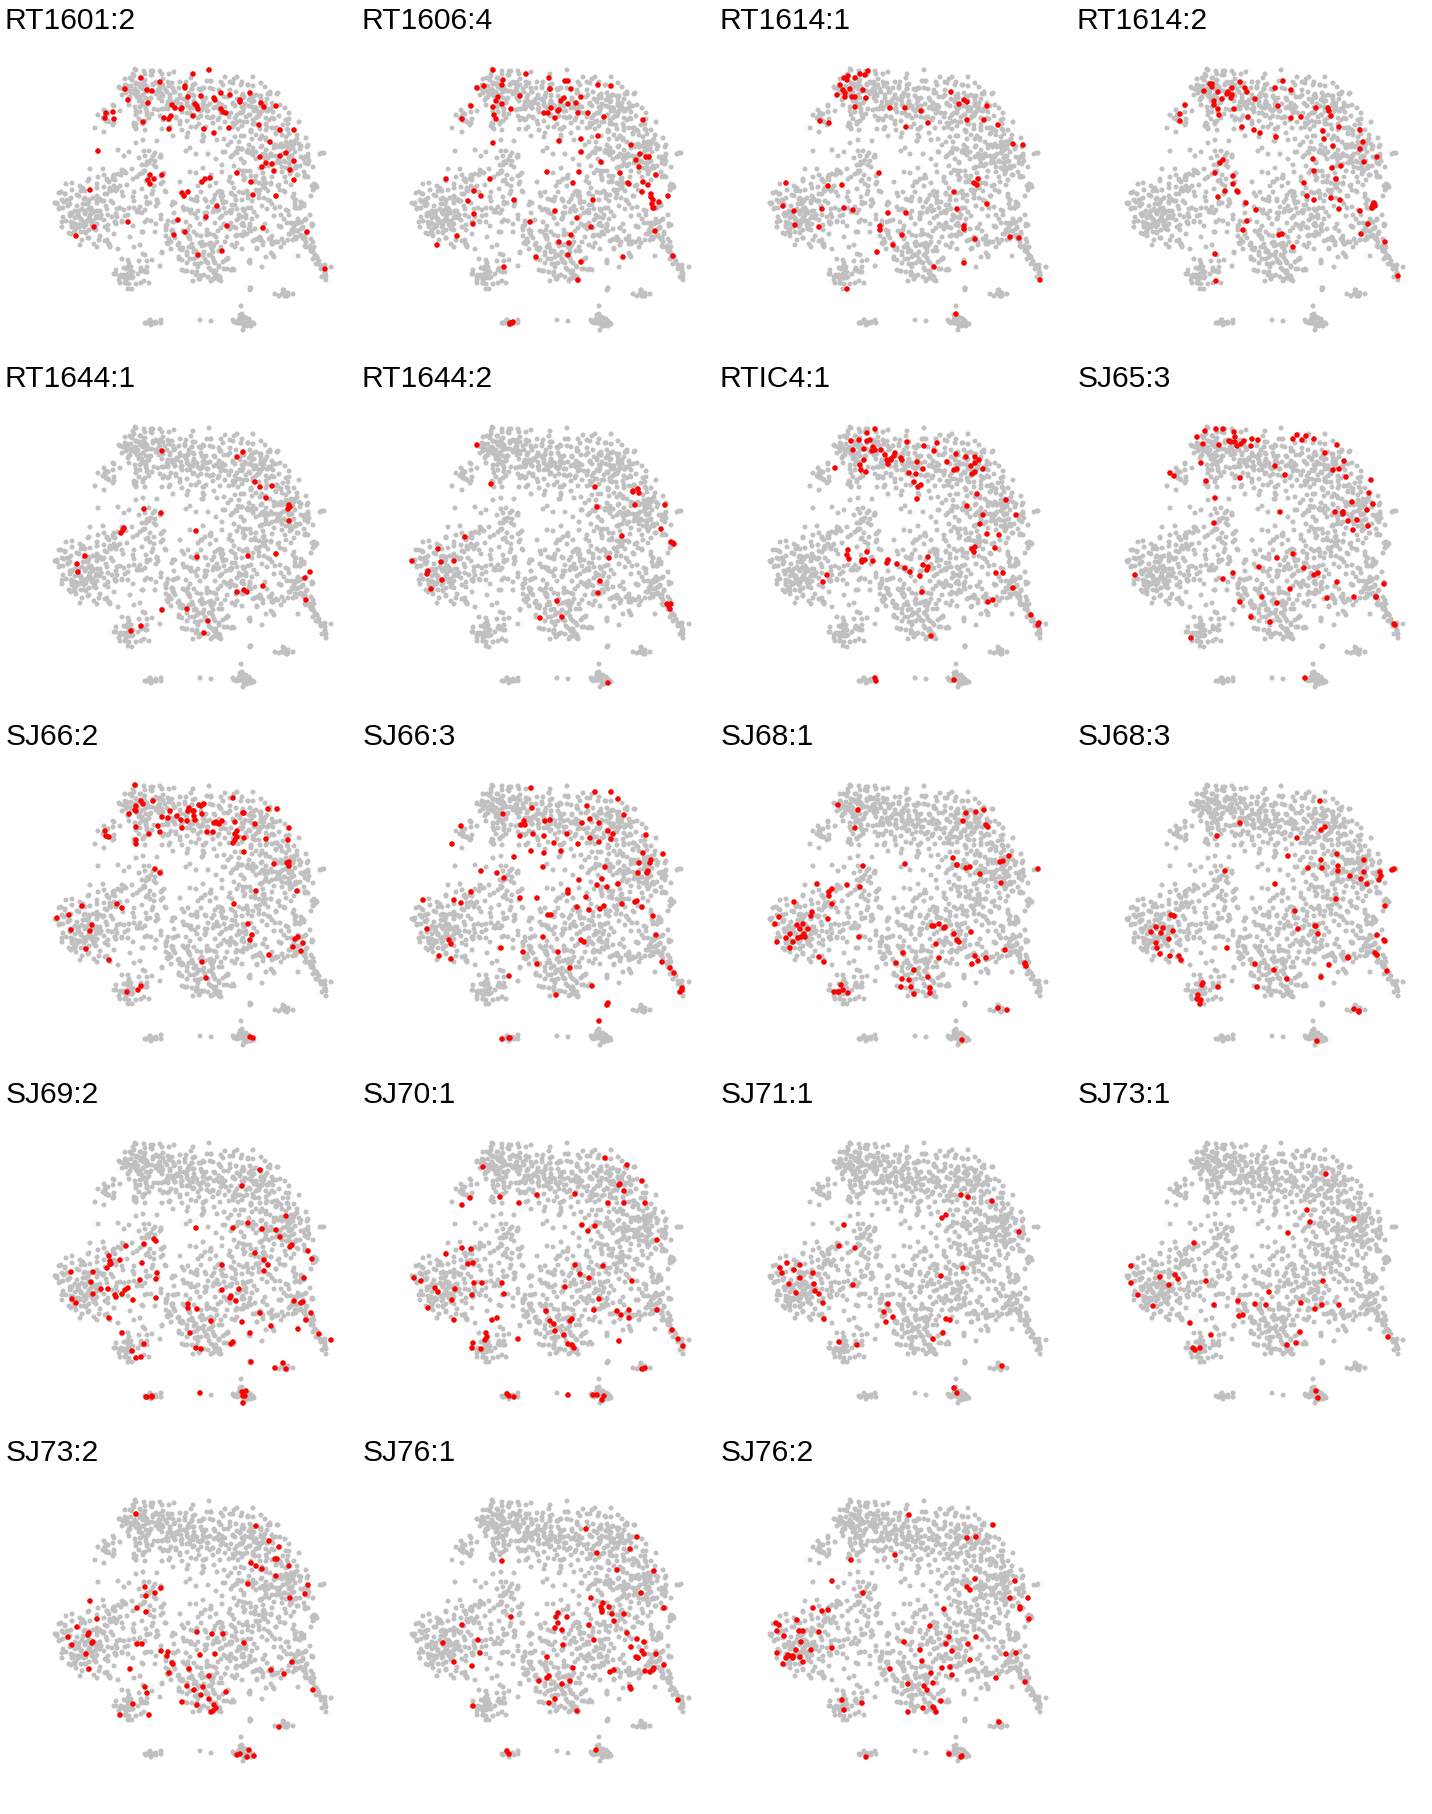

In [265]:
fig = plt.figure(facecolor = 'w', figsize = (20, 25))

tsne = tsne_1st

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - 1, x_max + 3)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - 1, x_max * (y_diff/x_diff) + 3)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

for ix, m in enumerate(mice):
    
    ax = plt.subplot(5,4, ix + 1)
    
    ix_sel = meta.ix['mouse_number', s_groups_2nd.index][meta.ix['mouse_number', s_groups_2nd.index]==m].index
    
    ax.scatter(tsne['x'],
            tsne['y'], 
            s = 25,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)

    ax.scatter(tsne.ix[ix_sel, 'x'],
                    tsne.ix[ix_sel, 'y'], 
                    s = 30,
                    linewidth = 0.0,
                    c = 'red',
                    edgecolor = 'red')
    
    ax.text(ax.get_xlim()[0], 
            ax.get_ylim()[1], 
            m, 
            family ='Liberation Sans', fontsize = 30)
    
    clean_axis(ax)
    
fig.tight_layout()
